o# CS3244 Group Project

# Preparation of the dataset:
## Steps Required:
  1. Import all the necessary Python libraries (numpy, pandas, matplotlib, seaborn).
  2. Import the Guns Incident CSV File from Google Drive.
  3. Observe the features and target of the Guns Incident Dataset.

In [ ]:
# Step 1: Importing all the relevant libraries for the Data Cleaning

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Importing the Guns Incident CSV File from Google Drive

from google.colab import drive
drive.mount('/content/drive')

data = '/content/drive/MyDrive/CS3244 Gun Incidence/Guns incident Data.csv'
df = pd.read_csv(data)

Mounted at /content/drive


In [ ]:
# Step 3: Observe the features and target of the Guns Incident Dataset

# Observing the shape of the dataset (number of rows and columns of dataset)
print(df.shape)

# Observing the first few rows of the dataset and its contents
df.head()

(100798, 12)


S.No.  Year  Month     Date   Reason     Education     Sex   Age  \
0      1  2017      1   6/1/17  Suicide     Bachelors    Male  35.0   
1      2  2017      1  19/1/17  Suicide  Some college  Female  22.0   
2      3  2017      1   1/1/17  Suicide     Bachelors    Male  61.0   
3      4  2017      2   6/2/17  Suicide     Bachelors    Male  65.0   
4      5  2017      2   9/2/17  Suicide   High School    Male  32.0   

                     Race  Hispanic Place of incident  Police involvement  
0  Asian/Pacific Islander       100              Home                   0  
1                   White       100            Street                   0  
2                   White       100   Other specified                   0  
3                   White       100              Home                   0  
4                   White       100   Other specified                   0

After printing the shape of the dataset, we observed that the dataset contains 100798 rows and 12 columns before the cleaning process. The 12 columns include `S.No.`, `Year`, `Month`, `Date`, `Reason`, `Education`, `Sex`, `Age`, `Race`, `Hispanic`, `Place of incident` and `Police involvement`.

# Data Cleaning
  ## Steps Required
  1. Check that the data types of all the columns are correct.
  2. Dealing with missing/NA values present in the dataset.
  3. Check for any duplicates and remove them accordingly.
  4. Remove irrelevant features/columns from dataset that do not contribute to the outcome.

In [ ]:
# Step 1: Check if all the columns of dataset have the right datatype

df.dtypes.rename("Data Type").reset_index()

index Data Type
0                S.No.     int64
1                 Year     int64
2                Month     int64
3                 Date    object
4               Reason    object
5            Education    object
6                  Sex    object
7                  Age   float64
8                 Race    object
9             Hispanic     int64
10   Place of incident    object
11  Police involvement     int64

When the column data types of the dataset are observed, it seems that for the `Date` column, the Data Type is `object`, which is not correct. We need to set the Data Type of the `Date` column to a `datetime` Data Type instead. For the remaining columns of the dataset, the datatypes are either correct or plausible.

In [ ]:
# Convert the 'Date' column to a 'datetime' Data Type

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df.dtypes.rename("Data Type").reset_index()

index       Data Type
0                S.No.           int64
1                 Year           int64
2                Month           int64
3                 Date  datetime64[ns]
4               Reason          object
5            Education          object
6                  Sex          object
7                  Age         float64
8                 Race          object
9             Hispanic           int64
10   Place of incident          object
11  Police involvement           int64

In [ ]:
# Step 2: Dealing with missing/NA values in the dataset

df.isna().sum().rename("Number of NAs").reset_index()

index  Number of NAs
0                S.No.              0
1                 Year              0
2                Month              0
3                 Date              0
4               Reason              0
5            Education           1422
6                  Sex              0
7                  Age             18
8                 Race              0
9             Hispanic              0
10   Place of incident           1384
11  Police involvement              0

Upon calculating the total number of `NA` values for each column of the dataset, we observe that there are 1422 NAs for `education`, 18 NAs for `Age` and 1384 NAs for `Place of incident`. The rest of the columns do not have any `NA` values.

Replacing the `NA` values with the mode/mean/median might affect the accuracy and results of the Machine Learning algorithms implemented subsequently, hence imputation might not be a suitable option to replace the `NA` values. Additionally, we have more than 100000 rows of data, implying that we have sufficent data for training, validation and testing. Hence, the best approach is to simply remove the data rows containing `NA` values from the dataset.

In [ ]:
# Remove all the NA values from the dataset
df.dropna(inplace = True)

# Observe the modified shape of the dataset
print(df.shape)

(98015, 12)


The dataset now contains 98015 rows instead of the initial 100798 rows, suggesting that we have successfully removed all the rows containing `NA` values. There are 100798 - 98015 = 2783 rows that contain at least one `NA` value.

In [ ]:
# Step 3: Check for any duplicates in the dataset

# First, we need to remove the S.No. column as S.No. is unique for all data rows
df.drop(columns = ['S.No.'], inplace = True)

# Check the total number of duplicates in the dataset
number_duplicates = df.duplicated().sum()
print(f'No. of duplicate rows: {number_duplicates}')

No. of duplicate rows: 3096


We observed that there are 3096 duplicate rows in the dataset. highlighting that we need to remove these duplicate rows before analysis as duplicate entries will also affect the results of the Machine Learning Algorithm.

In [ ]:
# Drop the duplicates in the dataset
df.drop_duplicates(inplace = True)

# Observe the modified shape of the dataset
df.shape

(94919, 11)

After printing out the shape of the dataset, there are 94919 rows left. This shows that all the duplicated rows of the dataset are removed as well. 98015 - 94919 = 3096 duplicated rows are removed, which tallies with our initial observation.

In [ ]:
# Step 4: Removing all the irrelevent features/columns from the dataset

# Remove Year and Month columns as the same information is found in the Date column
df.drop(columns=['Year', 'Month'], inplace = True)

# Remove Hispanic column as it does not make any sense having random values
df.drop(columns=['Hispanic'], inplace = True)

For the irrelevent features/columns of the dataset, first we removed the `Year` and `Month` columns as the year and month information is already reflected in the Date column of the dataset, suggesting that the `Year` and `Month` columns are duplicates of the `Date` columns and should be removed. We also removed the `Hispanic` column as we do not know what the values of `Hispanic` (eg. 100, 701) are referring to and it does not make any sense for `Hispanic` to have a certain numerical value that is not boolean-related. To prevent confusion, we dropped the `Hispanic` column as well.

In [ ]:
# Printing the final cleaned dataset for checking

df.head(n = 10)

Date        Reason              Education     Sex   Age  \
0  2017-01-06       Suicide              Bachelors    Male  35.0   
1  2017-01-19       Suicide           Some college  Female  22.0   
2  2017-01-01       Suicide              Bachelors    Male  61.0   
3  2017-02-06       Suicide              Bachelors    Male  65.0   
4  2017-02-09       Suicide            High School    Male  32.0   
5  2017-02-26       Suicide  Less than High School    Male  18.0   
6  2017-02-21  Undetermined            High School    Male  49.0   
7  2017-03-18       Suicide            High School    Male  42.0   
8  2017-02-13    Accidental           Some college    Male  51.0   
10 2017-02-03       Suicide           Some college    Male  31.0   

                              Race Place of incident  Police involvement  
0           Asian/Pacific Islander              Home                   0  
1                            White            Street                   0  
2                            White   Other specified                   0  
3                            White              Home                   0  
4                            White   Other specified                   0  
5   Native American/Native Alaskan              Home                   0  
6                            White              Home                   0  
7   Native American/Native Alaskan              Home                   0  
8                            White   Other specified                   0  
10                           White              Home                   0

# Visualising The Dataset Features And Outcome (Explanatory Data Analysis)
  Used `matplotlib` and `seaborn` libraries to visualise the dataset features and outcome through diagrams such as bar charts.

## Diagram 1: Visualising the distribution of the target variable, `Reason`.

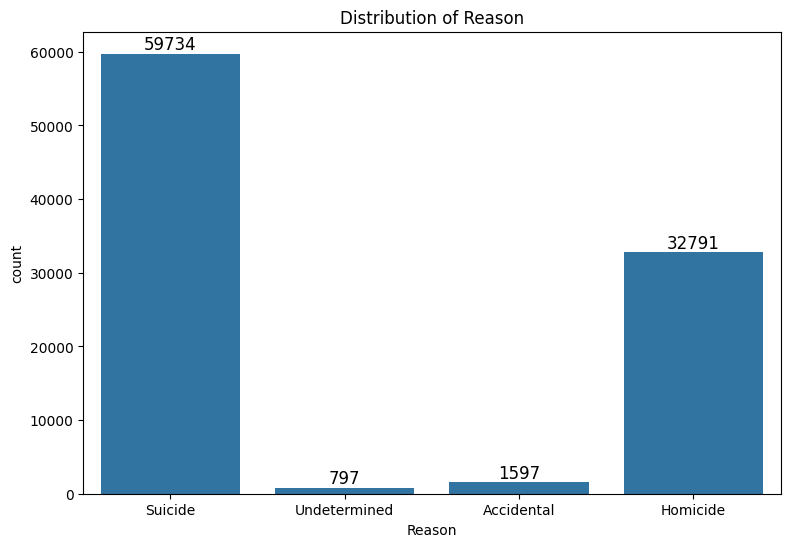

In [ ]:
# Analysing the distribution of the target variable, 'Reason', using a bar chart.
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', data=df)
plt.title('Distribution of Reason')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

**Key Observations:**

From the bar chart plotted, we observe that `Suicide` and `Homicide` contribute to a large proportion of deaths (around 60000 for `Suicide` and more than 30000 for `Homicide`). However, `Undetermined` and `Accidental` contribute to very few cases of death (less than 2000 each for both categories). Hence, we combined `Undertermined` and `Accidental` categories into a broader category called `Others`.

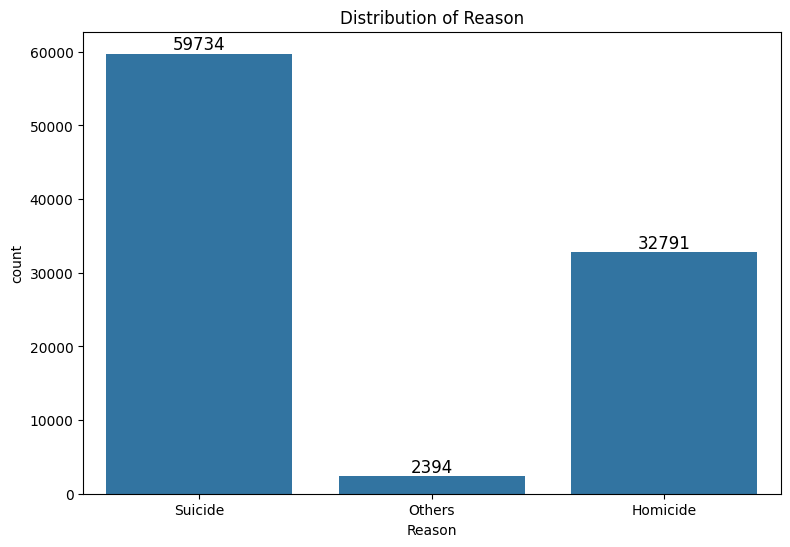

In [ ]:
# Combining Undetermined and Accidental categories into Others
df['Reason'] = df['Reason'].replace(['Accidental', 'Undetermined'], 'Others')

# Plot the new resultant diagram after the new classification
plt.figure(figsize=(9, 6))
bx=sns.countplot(x ='Reason', data = df)
plt.title('Distribution of Reason')
for p in bx.patches:
    bx.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

## Diagram 2: Visualising the distribution of the feature `Place of incident`.

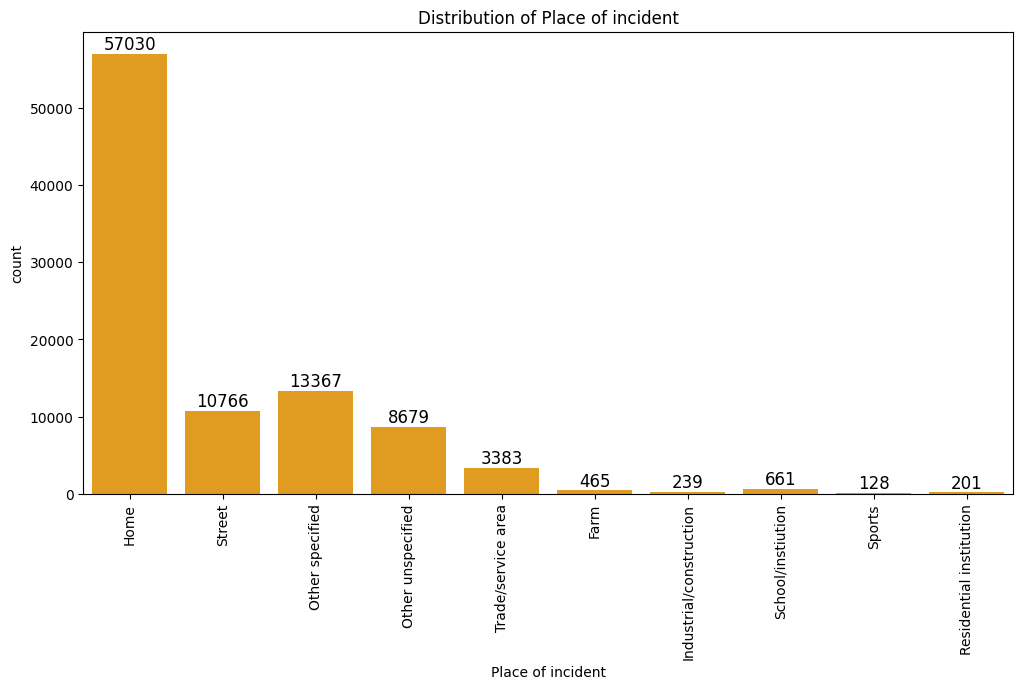

In [ ]:
# Analysing the distribution of the categorical variable, 'Place of incident', using a bar chart.
plt.figure(figsize=(12, 6))
cx=sns.countplot(x = 'Place of incident', data = df, color = 'orange')
plt.title('Distribution of Place of incident')
plt.xticks(rotation = 90)
for p in cx.patches:
    cx.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

**Key Observations:**

From the bar chart plotted, the known places of incident mostly come from `Home` and `Street`. We will classify `Other specified` and `Other unspecified` into a category called `Other Places`. The rest of the categories, including `Trade/service area`, `Farm`, `Industrial/construction`, `School/institution` and `Sports`, contain few observations and for simplicity, we classify these categories as `Miscellaneous`.

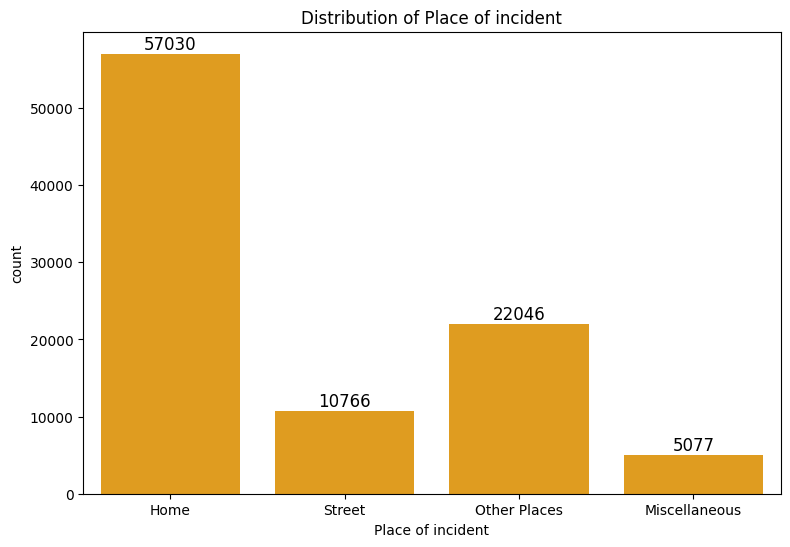

In [ ]:
# Combining 'Other specified' and 'Other unspecified' into the column 'Other Places'.
df['Place of incident'] = df['Place of incident'].replace(['Other specified', 'Other unspecified'], 'Other Places')

# Combining 'Trade/service area', 'Farm', 'Industrial/construction', 'School/institution' and 'Sports' into the column 'Miscellaneous'.
df['Place of incident'] = df['Place of incident'].replace(['Trade/service area', 'Farm', 'Industrial/construction', 'School/instiution', 'Sports', 'Residential institution'], 'Miscellaneous')

# Plot the new resultant diagram after the new classification
plt.figure(figsize=(9, 6))
ax=sns.countplot(x = 'Place of incident', data = df, color = 'orange')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Place of incident')
plt.show()

## Diagram 3: Visualising the distribution of the feature `Age`.


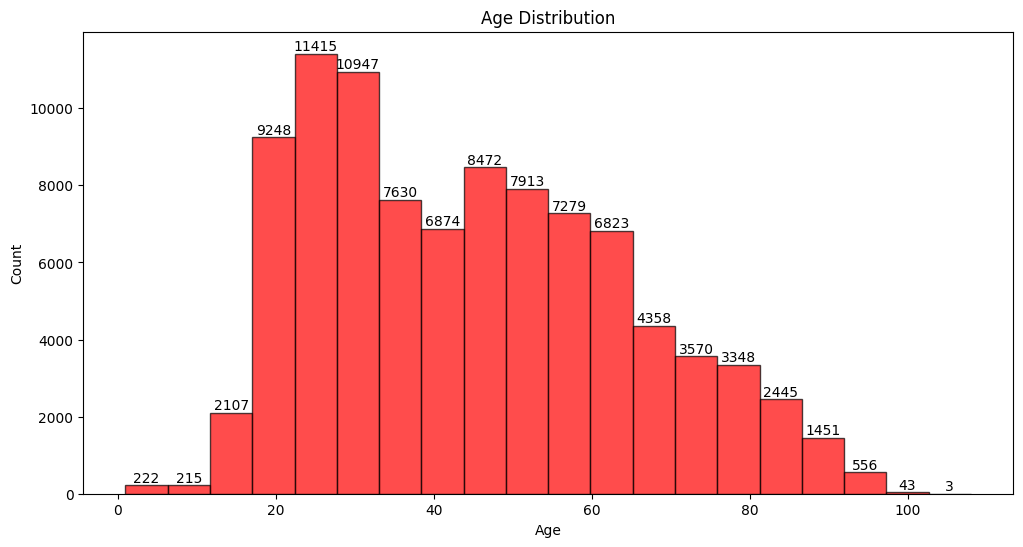

In [ ]:
# Analysing the distribution of the numerical variable 'Age' using a histogram
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(df['Age'], bins=20, color='red', edgecolor='black', alpha=0.7)
for count, bin_edge, patch in zip(counts, bins, patches):
    bar_center = patch.get_x() + patch.get_width() / 2
    plt.text(bar_center, count + 2,
             f'{int(count)}',
             ha='center', va='bottom',
             fontsize=10, color='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


**Key Observations:**

From the histogram, we observe that the age ranges from a very small number (close to 0) to a very large number (around 100). Most people have the age range of between 20 and 60. We do not observe any significant skew (left skew/right skew) in the age range.

## Diagram 4: Visualising the distribution of the outcome `Reason` with respect to the feature `Place of incident`.

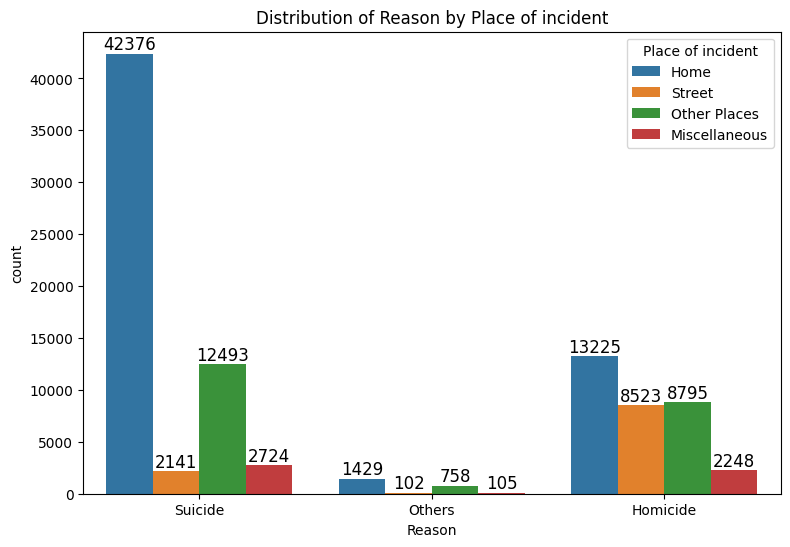

In [ ]:
# Analysing the distribution of the outcome 'Reason' by the feature 'Place of incident' using a countplot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', hue='Place of incident', data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Reason by Place of incident')
plt.show()

**Key Observations:**

From the countplot diagram, we observed that for all the three reasons - `Suicide`, `Others` and `Homicide`, the place of incident `Home` contributes the most. Furthermore, the place of incident `Other Places` contributes the second most for all three reasons as well. For the reason `Others`, `Street` and `Miscellaneous` have near zero cases.

## Diagram 5: Visualising the distribution of the outcome `Reason` with respect to the feature `Race`.

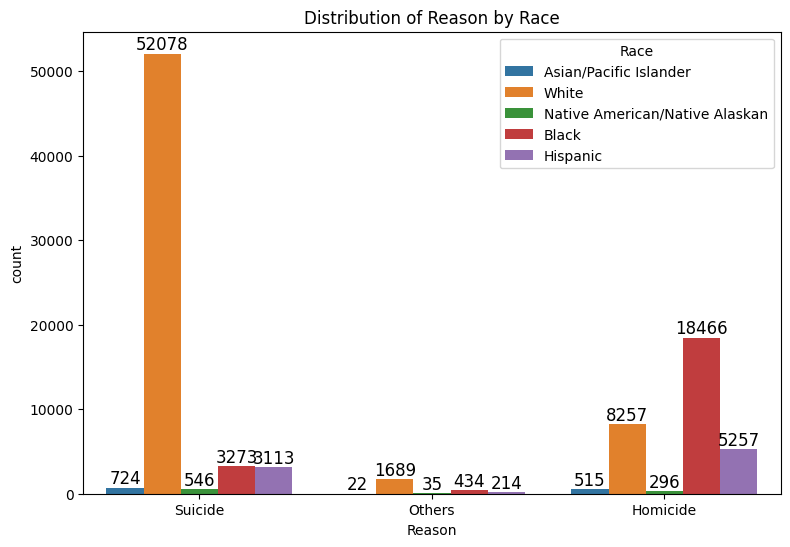

In [ ]:
# Analysing the distribution of the outcome 'Reason' by the feature 'Race' using a countplot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', hue='Race', data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Reason by Race')

plt.show()

**Key Observations:**

Through the countplot, we observed that for the reason `Suicide` and `Others`, `White` race contributes the most while for the reason `Homicide`, `Black` race contributes the most. Also, races `Asian/Pacific Islander` and `Native American/Native Alaskan` contribute insignificantly to all the three reasons.

## Diagram 6: Visualising the distribution of the outcome `Reason` with respect to the feature `Education`.

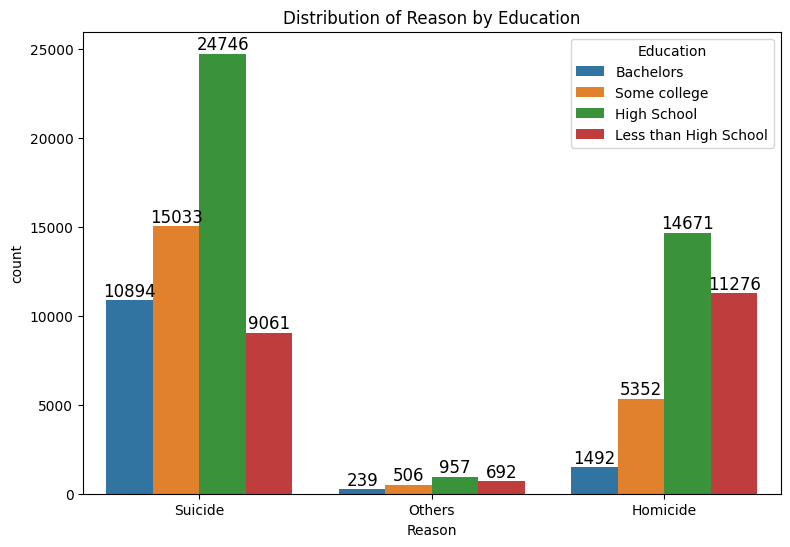

In [ ]:
# Analysing the distribution of the outcome 'Reason' by the feature 'Education' through a countplot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', hue='Education', data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Reason by Education')
plt.show()

**Key Observations:**

Analysing the countplot diagram, we observed that for all three reasons - `Suicide`, `Others` and `Homicide`, `High School` contributes the most. `Some college` contributes more to `Suicide` while `Less than High School` contributes more to `Others` and `Homicide`. `Bachelors` contributes significantly less to the `Others` and `Homicide`.

# Importing The Necessary Packages For The Decision Tree Model

In [ ]:
!pip install -q imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from scipy.stats import randint
import time, random

# Implementing The Decision Tree Model

## Step 1: Implement the Decision Tree model (without taking into account best parameters)

### Actions Required:
  1. **Encoding all the categorical variables** into numeric/integers/floats
  2. Extract the relevant features and target from the dataset (`X` and `y`)
  3. Perform train-test-split on the dataset (default 80% train, 20% test)
  4. Implementing the Decision Tree Classifier on the training dataset
  5. Predicting the outcome of the testing dataset (`y_pred`) from `X_test`
  6. Gauge the accuracy of the Decision Tree model implemented

................................................................................................................................................................................................................................................

### Step 1.1: Encoding all categorical variables into numeric/integers/floats
We identified that there are many categorical variables in this dataset, including `Education`, `Sex`, `Race` and `Place of incident`. The only numeric variables are `Age` and `Police Involvement`. We are required to encode the `Education`, `Sex`, `Race` and `Place of incident` columns. For now, we will leave the `Date` column as it is.




In [ ]:
# Encoding the categorical variables
label_encoder_reason = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_place = LabelEncoder()

In [ ]:
# Encode 'Reason' column
df['Reason Encoded'] = label_encoder_reason.fit_transform(df['Reason'])

# Encode 'Education' column
df['Education Encoded'] = label_encoder_education.fit_transform(df['Education'])

# Encode 'Sex' column
df['Sex Encoded'] = label_encoder_sex.fit_transform(df['Sex'])

# Encode 'Race' column
df['Race Encoded'] = label_encoder_race.fit_transform(df['Race'])

# Encode 'Place of incident' column
df['Place Encoded'] = label_encoder_place.fit_transform(df['Place of incident'])

In [ ]:
# Extract the relevant columns, dropping the original unencoded categorical columns
df = df[['Date', 'Reason Encoded', 'Education Encoded', 'Sex Encoded', 'Age',
         'Race Encoded', 'Place Encoded', 'Police involvement']]

df.head()

Date  Reason Encoded  Education Encoded  Sex Encoded   Age  \
0 2017-01-06               2                  0            1  35.0   
1 2017-01-19               2                  3            0  22.0   
2 2017-01-01               2                  0            1  61.0   
3 2017-02-06               2                  0            1  65.0   
4 2017-02-09               2                  1            1  32.0   

   Race Encoded  Place Encoded  Police involvement  
0             0              0                   0  
1             4              3                   0  
2             4              2                   0  
3             4              0                   0  
4             4              2                   0

We observe that the new `Reason Encoded`, `Education Encoded`, `Sex Encoded`, `Race Encoded` and `Place Encoded `columns are now encoded with numbers, with each category representing a particular number. `Age` and `Police involvement` columns do not need any encoding as they are of type `float` and `integer` respectively which can work under Decision Tree models.

We need to be aware of all the encoding numbers for each category of each feature as the encoded numbers will be displayed in the Decision Tree diagram subsequently.

In [ ]:
# Finding the classes for each feature
print("Reason classes:", label_encoder_reason.classes_)
print("\nEducation classes:", label_encoder_education.classes_)
print("\nSex classes:", label_encoder_sex.classes_)
print("\nRace classes:", label_encoder_race.classes_)
print("\nPlace classes:", label_encoder_place.classes_)

Reason classes: ['Homicide' 'Others' 'Suicide']

Education classes: ['Bachelors' 'High School' 'Less than High School' 'Some college']

Sex classes: ['Female' 'Male']

Race classes: ['Asian/Pacific Islander' 'Black' 'Hispanic'
 'Native American/Native Alaskan' 'White']

Place classes: ['Home' 'Miscellaneous' 'Other Places' 'Street']


The tables below are summaries of the various encoded numbers for the various features:

<table>
<thead>
<td>Encoded Number</td>
<td>Reason</td>
<td>Education</td>
<td>Sex</td>  
<td>Race</td>
<td>Place</td>
</thead>

<tr>
<td>0</td>
<td>Homicide</td>
<td>Bachelors</td>
<td>Female</td>
<td>Asian/Pacific Islander</td>
<td>Home</td>

<tr>
<td>1</td>
<td>Others</td>
<td>High School</td>
<td>Male</td>
<td>Black</td>
<td>Miscellaneous</td>

<tr>
<td>2</td>
<td>Suicide</td>
<td>Less than High School</td>
<td></td>
<td>Hispanic</td>
<td>Other Places</td>

<tr>
<td>3</td>
<td></td>
<td>Some College</td>
<td></td>
<td>Native American/Native Alaskan</td>
<td>Street</td>

<tr>
<td>4</td>
<td></td>
<td></td>
<td></td>
<td>White</td>
<td></td>


</tfoot>
</table>

Next comes the modification of the `Date` column. We will extract the date column and obtain the respective years and months of the dates accordingly using `dt.year` and `dt.month` from the `datetime` package. As for the days of the dates, we will change to the weekday/weekend type (eg: Monday, Tuesday, Wednesday etc.) as encoded types as well. We will save the resulting dataset as `df_modified`.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
# Modifying the Year and Month Of Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df.head()

Date  Reason Encoded  Education Encoded  Sex Encoded   Age  \
0 2017-01-06               2                  0            1  35.0   
1 2017-01-19               2                  3            0  22.0   
2 2017-01-01               2                  0            1  61.0   
3 2017-02-06               2                  0            1  65.0   
4 2017-02-09               2                  1            1  32.0   

   Race Encoded  Place Encoded  Police involvement  Year  Month  
0             0              0                   0  2017      1  
1             4              3                   0  2017      1  
2             4              2                   0  2017      1  
3             4              0                   0  2017      2  
4             4              2                   0  2017      2

In [ ]:
# Modifying the Day of Date column
df['Day Of Week'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.dayofweek + 1
df_modified = df.drop(columns=['Date'])

df_modified.head()

Reason Encoded  Education Encoded  Sex Encoded   Age  Race Encoded  \
0               2                  0            1  35.0             0   
1               2                  3            0  22.0             4   
2               2                  0            1  61.0             4   
3               2                  0            1  65.0             4   
4               2                  1            1  32.0             4   

   Place Encoded  Police involvement  Year  Month  Day Of Week  
0              0                   0  2017      1            5  
1              3                   0  2017      1            4  
2              2                   0  2017      1            7  
3              0                   0  2017      2            1  
4              2                   0  2017      2            4

By default in Python, the `Day Of Week` starts from 0 (Monday) and ends at 6 (Sunday). However, from the code above, a +1 is added such that now the day of week starts from 1 (Monday) and ends at 7 (Sunday). This ensures consistency and less confusion as we generally start measuring the `Day Of Week` to be on Monday, which is the first day of the week.

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Day Of Week</th>
    <th style="padding: 12px;">Encoded Numbers</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">Monday</td>
    <td style="padding: 12px;">1</td>
</tr>
<tr>
    <td style="padding: 12px;">Tuesday</td>
    <td style="padding: 12px;">2</td>
</tr>
<tr>
    <td style="padding: 12px;">Wednesday</td>
    <td style="padding: 12px;">3</td>
</tr>
<tr>
    <td style="padding: 12px;">Thursday</td>
    <td style="padding: 12px;">4</td>
</tr>
<tr>
    <td style="padding: 12px;">Friday</td>
    <td style="padding: 12px;">5</td>
</tr>
<tr>
    <td style="padding: 12px;">Saturday</td>
    <td style="padding: 12px;">6</td>
</tr>
<tr>
    <td style="padding: 12px;">Sunday</td>
    <td style="padding: 12px;">7</td>
</tr>
</tbody>

</table>

................................................................................................................................................................................................................................................

### Step 1.2: Extract the relevant features and target from the modified dataset with encodings

After encoding and modifying the `Date` column, we now have `Reason Encoded` as the target and the rest of the columns - `Year`, `Education Encoded`, `Sex Encoded`, `Age`, `Race Encoded`, `Place Encoded` and `Police involvement` as the features. We can subset the features and the target columns into `X` and `y` respectively before performing the `train-test-split`.

In [ ]:
# Subsetting the df_modified dataset into features (X) and target (y)
X = df_modified[['Year', 'Month', 'Day Of Week', 'Education Encoded',
                 'Sex Encoded', 'Age', 'Race Encoded', 'Place Encoded',
                 'Police involvement']]
y = df_modified['Reason Encoded']

................................................................................................................................................................................................................................................

### Step 1.3: Performing the train-test-split on the dataset

We can subsequently perform the `train-test-split` on the dataset. We set the default train data to be 80% of the total number of rows of the dataset and the test data to be the remaining 20% of the total number of rows of the dataset. We set the random state of the `train-test-split` to be 0 (similar to setting seed value to be 0) in order to produce the same results each time the code is run for consistency.

In [ ]:
# Performing the train-test-split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

................................................................................................................................................................................................................................................

### Step 1.4: Fitting the training dataset and predicting the test dataset after fitting

First, we need to call the `DecisionTreeClassifier` from the `scikit-learn.trees` package. Afterwards, we can train the model using the results from the training set. After training the model, we can predict the target of the test dataset (`y_pred`) from the features of the test dataset (`X_test`).

In [ ]:
# Call the DecisionTreeClassifier from sklearn.trees
decision_tree_classifier = DecisionTreeClassifier()

# Train the Decision Tree model using the training dataset
decision_tree_classifier.fit(X_train, y_train)

# Predict the target (y_pred) of the test dataset from its features (X_test)
y_pred = decision_tree_classifier.predict(X_test)

................................................................................................................................................................................................................................................

### Step 1.5: Finding the original accuracy of the Decision Tree model (without any hyperparameter tuning or bagging/boosting methods)

We can now find the accuracy of the Decision Tree model implemented. This model is implemented without any hyperparameter tuning or bagging/boosting methods that can help improve its accuracy.

In [ ]:
# Finding the accuracy of the Decision Tree model implemented
model_accuracy = accuracy_score(y_pred, y_test)
print(round(model_accuracy, 3))

0.719


We managed to obtain an accuracy of around 72%. For about 4 data rows, the Decision Tree model can acccurately predict about 3 outcomes correctly, but 1 will be incorrectly classfied. We can hence optimize the Decision Tree model to improve its accuracy by using optimization techniques such as hyperparameter tuning and bagging/boosting.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 2: Perform Hyperparameter Tuning on Decision Tree

In this step, we will optimize the performance of our Decision Tree model by performing hyperparameter tuning. Hyperparameter tuning involves systematically searching for the best combination of hyperparameters that govern the behavior of the model. By adjusting these parameters, we aim to improve the model's accuracy. We will focus on two types of hyperparameter tuning - `GridSearchCV` and `RandomizedSearchCV`.

Differences Between `GridSearchCV` and `RandomizedSearchCV`:

**Grid Search CV:**

Grid Search Cross-Validation performs an exhaustive search over a manually specified subset of the hyperparameter space. It evaluates every possible combination of the hyperparameter values that is specified.

**Randomized Search CV:**

Randomized Search Cross-Validation performs a random search over a specified number of parameter combinations. Instead of trying all possible combinations, it randomly samples a given number of hyperparameter combinations from a defined distribution or list.

### Actions Required:
  1. For Grid Search Cross Validation - Create a dictionary, `param_grid`, that contains selected `criterion`, `max_depth`, `min_samples_split` and `min_samples_leaf` values.
  2. Perform the Grid Search Cross Validation on the Decision Tree model.
  3. Obtain the best values for each of the 4 parameters - `criterion`, `max_depth`, `min_samples_split` and `min_samples_leaf`.
  4. Repeat the same process for Randomized Search Cross Validation but give lists of values for `max_depth`, `min_samples_split` and `min_samples_leaf`.


................................................................................................................................................................................................................................................

### Step 2.1: For Grid Search Cross Validation, create dictionary `param_grid` for selected values of the four parameters

We will define a grid of hyperparameters `param_grid_GSCV` that contains the four parameters - `criterion`, `max_depth`, `min_samples_split` and `min_samples_leaf`.

Parameter 1: `criterion` - This parameter specifies the function used to measure the quality of a split (how to determine the best way to split the data at each node)

Parameter 2: `max_depth` - This parameter limits the maximum depth of the decision tree (the number of levels it can have from the root to the deepest leaf)

Parameter 3: `min_samples_split` - This parameter controls the minimum number of samples required to split an internal node (for a node to consider creating further branches)

Parameter 4: `min_samples_leaf` - This parameter defines the minimum number of samples required to be present in a leaf node (the final node of a branch)

In [ ]:
# Define the param_grid dictionary containing all the parameters considered and
# the respective values the parameters can take
param_grid_GSCV = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5],
    'min_samples_split': [2, 4, 6, 10, 20],
    'min_samples_leaf': [2, 4, 6, 10, 20]
}

................................................................................................................................................................................................................................................

### Step 2.2: Performing the Grid Search Cross Validation on the Decision Tree model

We will use `GridSearchCV` from the `sklearn.model_selection` module, which allows us to specify a grid of hyperparameters to search through. It will evaluate the model's performance using cross-validation for each combination of hyperparameters, ensuring that we find the most effective settings for our Decision Tree. This process not only helps in enhancing accuracy but also in preventing overfitting by identifying optimal model complexity.


In [ ]:
# Applying the Grid Search Cross Validation for the Decision Tree model
grid_search = GridSearchCV(estimator = decision_tree_classifier,
                           param_grid = param_grid_GSCV, cv = 5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5],
                         'min_samples_leaf': [2, 4, 6, 10, 20],
                         'min_samples_split': [2, 4, 6, 10, 20]})

................................................................................................................................................................................................................................................

### Step 2.3: Obtaining the optimal values for the 4 parameters for the re-construction of the Decision Tree model (For Grid Search CV)

After the Grid Search Cross Validation, we can then find the optimal values of the 4 parameters in order to improve the accuracy of the Decison Tree model when re-implemented in the next step. This can be done via the `grid_search.best_params` method.

In [ ]:
# Printing out the most optimal values of the hyperparameters for the Decision Tree model
print("Grid Search Cross Validation:")
print("\n")
print("Best Parameters: " , grid_search.best_params_)

Grid Search Cross Validation:


Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


After performing the Grid Search Cross Validation, we managed to find out that the best parameters for the Decision Tree model is where:

1) `Criterion` - Gini

2) `Max Depth` - 5

3) `Min Samples Leaf` - 4

4) `Min Samples Split` - 2

................................................................................................................................................................................................................................................

### Step 2.4: Repeat the same process for Randomized Search Cross Validation

We will repeat the same Steps 2.1 to 2.3 using `RandomizedSearchCV` this time. The difference is that for `RandomizedSearchCV`, we will specify a sequence of values for `max_depth`, `min_samples_split` and `min_samples_leaf` respectively. Criterion will be kept the same as a list of `Gini` and `Entropy`. We will store the values in `param_distributions`.

The `RandomizedSearchCV` has 1 more additional parameter that is not present in `GridSearchCV`, the `n_iter` parameter. The `n_iter` parameter specifies the number of different combinations of hyperparameters to sample and evaluate during the random search. Unlike `GridSearchCV`, which evaluates all possible combinations of specified hyperparameters, `RandomizedSearchCV` randomly samples a fixed number of combinations from the hyperparameter space defined in the `param_distributions`. The default value of `n_iter` is set to 100.

In [ ]:
# Define the param_grid dictionary containing all the parameters considered and
# the respective values the parameters can take
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 6),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(2, 20)
}

In [ ]:
# Applying the Random Search Cross Validation for the Decision Tree model
randomized_search = RandomizedSearchCV(estimator = decision_tree_classifier,
                                       param_distributions = param_distributions,
                                       cv = 5, n_iter = 100,
                                       random_state = 42)

randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c9a6ffa2530>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c9a6ffa28c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c9a6ffa1510>},
                   random_state=42)

In [ ]:
# Printing out the most optimal values of the hyperparameters for the Decision Tree model
print("Randomized Search Cross Validation:")
print("\n")
print("Best Parameters: " , randomized_search.best_params_)

Randomized Search Cross Validation:


Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 9}


After performing the Randomized Search Cross Validation, we managed to find out that the best parameters for the Decision Tree model is where:

1) `Criterion` - Gini

2) `Max Depth` - 5

3) `Min Samples Leaf` - 5

4) `Min Samples Split` - 9

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 3: Re-implement the Decision Tree Model (with the most accurate hyperparameters)

In this step, we will create new Decision Tree models using the better hyperparameters identified in the previous step for both `GridSearchCV` and `RandomizedSearchCV`. By leveraging these optimized parameters, we aim to enhance the models' accuracy and overall performance on the test dataset. After fitting the models to the training data, we will use them to make predictions on the test set and evaluate their accuracies.

### Actions Required:
  1. Re-implement the Decision Tree Classifier model using the optimized values of parameters from the hyperparameter tuning (Grid Search Cross Validation)
  2. Similar to Step 1.5, fitting the training dataset and predicting the test dataset (`y_pred_optimised`) from `X_test` (Grid Search Cross Validation)
  3. Repeat the same process but using Randomized Search Cross Validation.

................................................................................................................................................................................................................................................

### Step 3.1: Re-implementing the Decision Tree Classifier using the optimised values obtained from hyperparameter tuning (Grid Search Cross Validation)

From Step 2.3, we have realised that the optimal parameters after hyperparameter tuning are the `criterion` of Gini, a `max_depth` of 5, `min_samples_leaf` of 4 and `min_samples_split` of 2. Hence. we should pass these arguments into the `DecisionTreeClassifier` for analysis before fitting, training and predicting.

In [ ]:
# Run the Decision Tree Classifier Model with the optimized parameter values as arguments
optimised_decision_tree_GSCV = DecisionTreeClassifier(criterion = 'gini',
                                                      max_depth = 5,
                                                      min_samples_leaf = 4,
                                                      min_samples_split = 2)

................................................................................................................................................................................................................................................

### Step 3.2: Fitting the training dataset and predicting the test dataset (Grid Search Cross Validation)

Similar to Step 1.5, we need to first fit the training dataset using the `optimised_decision_tree `. Afterwards, we then predict the testing dataset `y_pred_optimised` from the data of `X_test`. Subsequently, calculate the new optimised accuracy score `model_accuracy_optimised`. We should expect that the value of` model_accuracy_optimised` will be higher than the value of `model_accuracy` in Step 1.6 as now optimization via hyperparameter tuning is taken into account.

In [ ]:
# Similarly, perform fitting with the training data
optimised_decision_tree_GSCV.fit(X_train, y_train)

# Similarly, perform prediction on the testing data
y_pred_optimised_GSCV = optimised_decision_tree_GSCV.predict(X_test)

In [ ]:
# Similarly, perform accuracy score on the optimized Decision Tree model
model_accuracy_optimised_GSCV = accuracy_score(y_pred_optimised_GSCV, y_test)

print("Grid Search Cross Validation")
print("\n")
print(f"Accuracy Score: {model_accuracy_optimised_GSCV:.3f}")

Grid Search Cross Validation


Accuracy Score: 0.825


After optimization using hyperparameter tuning, our Decision Tree model with `GridSearchCV` accuracy has increased moderately by 10% from 72% in Step 1.6 before the optimization process to 82.5% after the hyperparameter tuning process. Now more than 4 in 5 data outcomes are predicted correctly under the hyperparameter tuned Decision Tree model.

................................................................................................................................................................................................................................................

### Step 3.3: Repeat the same process for Randomized Search Cross Validation Model

The process in Step 3.1 is repeated but this time, using the `RandomizedSearchCV` optimal parameters for the `DecisionTreeClassifier`. From Step 2.4, the optimal parameters of the `RandomizedSearchCV` are the `criterion` of `Gini`, `max_depth` of 5, `min_samples_leaf` of 5 and `min_samples_split` of 9.

In [ ]:
# Run the Decision Tree Classifier Model with the optimized parameter values as arguments
optimised_decision_tree_RSCV = DecisionTreeClassifier(criterion = 'gini',
                                                      max_depth = 5,
                                                      min_samples_leaf = 5,
                                                      min_samples_split = 9)

In [ ]:
# Similarly, perform fitting with the training data
optimised_decision_tree_RSCV.fit(X_train, y_train)

# Similarly, perform prediction on the testing data
y_pred_optimised_RSCV = optimised_decision_tree_RSCV.predict(X_test)

In [ ]:
# Similarly, perform accuracy score on the optimized Decision Tree model
model_accuracy_optimised_RSCV = accuracy_score(y_pred_optimised_RSCV, y_test)

print("Randomized Search Cross Validation")
print("\n")
print(f"Accuracy Score: {model_accuracy_optimised_RSCV:.3f}")

Randomized Search Cross Validation


Accuracy Score: 0.825


After optimization using hyperparameter tuning, our Decision Tree model with `RandomizedSearchCV` accuracy has increased moderately by 10% from 72% in Step 1.6 before the optimization process to 82.5% after the hyperparameter tuning process, similar to the `GridSearchCV` model.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 4: Gauge the run-time of the Decision Tree Model and evaluate the model in terms of both accuracy and efficiency

Next, we will assess the efficiency of the optimised Decision Tree model by calculating the run-time taken to make predictions. This will give us insights into how well the model performs (accuracy) and its efficiency (run-time).

### Actions Required:
  1. Find the time taken for the training, fitting and prediction process for the Unoptimised Decision Tree Classifier.
  2. Find the time taken for the optimized hyparameter tuning process for the Optimised Decision Tree Classifier.
  3. Find the time taken for the training, fitting and prediction process for the Optimised Decision Tree Classifier.
  4. Find the total time taken for the Optimised Decision Tree Classifier process.


................................................................................................................................................................................................................................................

### Step 4.1: Finding the run-time of the training, fitting and prediction process for Unoptimised Decision Tree

To find the run-time of a particular process, we can use the `time.time` method from the time package twice, once at the start and once at the end. Afterwards, we can calculate the difference between the start and end values.

In [ ]:
# Assign start time of run-time process
start_time_one = time.time()

# Copy-Paste the code from Step 1.5 - Unoptimised Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)

# Assign end time of run-time process
end_time_one = time.time()

# Calculate the difference between start time and end time
run_time_one = end_time_one - start_time_one

In [ ]:
# Calculate the difference between start time and end time
run_time_one = end_time_one - start_time_one

print("Unoptimised Decision Tree Model: ")
print(f"\nAccuracy: {model_accuracy:.3f}")
print(f"\nTotal Run Time: {run_time_one:.1f} seconds")

Unoptimised Decision Tree Model: 

Accuracy: 0.719

Total Run Time: 0.2 seconds


We observed that the total run-time for the unoptimised Decision Tree model is about 0.2 to 0.3 seconds, which is considered quite fast. This is expected as the unoptimized Decision Tree model does not take into account any optimization processes such as hyperparameter tuning. The accuracy of the model is about 0.72 as calculated in Step 1.6.

................................................................................................................................................................................................................................................

### Step 4.2: Finding the time taken for optimizing Decision Tree model via `GridSearchCV`

For the calculation of run-time via hyperparameter tuning, we need to measure the run-time of the GridSearchCV process in Step 2.2 as this is used to determine the optimised values of the various hyperparameters in the Decision Tree model.

In [ ]:
# Assign start time of run-time process
start_time_two = time.time()

# Copy-Paste the code from Step 2.2 - Hyperparameter Tuning via GridSearchCV
grid_search = GridSearchCV(estimator = decision_tree_classifier,
                           param_grid = param_grid_GSCV, cv = 5)
grid_search.fit(X_train, y_train)

# Assign end time of run-time process
end_time_two = time.time()

In [ ]:
# Calculate the difference between start time and end time
run_time_two = end_time_two - start_time_two

print("Hyperparameter Tuning (GridSearchCV): ")
print(f"\nRun Time: {run_time_two:.1f} seconds")

Hyperparameter Tuning (GridSearchCV): 

Run Time: 30.1 seconds


The run-time for the hyperparameter tuning process for `GridSearchCV` turned out to be around 30 seconds. This is because time is needed to search for the best combination of parameter values for a given range of values of `max_depth`, `min_sample_leaf` and `min_sample_split`. There will be many iterations, leading to long run-times for the `GridSearchCV` process.

................................................................................................................................................................................................................................................

### Step 4.3: Finding the run-time of the training, fitting and prediction process for optimising Decision Tree via `GridSearchCV`

Additionally, for the Optimised Decision Tree with `GridSearchCV`, we also need to find the run-time of the training, fitting and prediction process after the hyperparameter tuning.

In [ ]:
# Assign start time of run-time process
start_time_three = time.time()

# Copy-Paste the code from Steps 3.1 and 3.2 - Optimised Decision Tree Classifier
optimised_decision_tree_GSCV = DecisionTreeClassifier(criterion = 'gini',
                                                      max_depth = 5,
                                                      min_samples_leaf = 4,
                                                      min_samples_split = 2)

optimised_decision_tree_GSCV.fit(X_train, y_train)
y_pred_optimised_GSCV = optimised_decision_tree_GSCV.predict(X_test)

# Assign end time of run-time process
end_time_three = time.time()

In [ ]:
# Calculate the difference between start time and end time
run_time_three = end_time_three - start_time_three

print("Fitting and Predicting (GridSearchCV): ")
print(f"\nRun Time: {run_time_three:.1f} seconds")

Fitting and Predicting (GridSearchCV): 

Run Time: 0.1 seconds


The run-time for the fitting and predicting process for the Optimised Decision Tree model via `GridSearchCV` is around 0.1 seconds, which is considerably faster compared to the same process used for the Unoptimised Decision Tree model.

................................................................................................................................................................................................................................................

### Step 4.4: Finding the total run-time taken for the Optimised Decision Tree model (GridSearchCV)

For this step, to find the total run-time taken for the `GridSearchCV` Optimised Decision Tree model, we can simply add the time taken for the `GridSearchCV` Optimised Decision Tree model to perform the optimisation via hyperparameter tuning (Step 5.2) and the time taken for the same `GridSearchCV` Optimised Decision Tree model to fit and predict (Step 5.3).

In [ ]:
# Finding the total run-time for Optimised Decision Tree model (GridSearchCV)
print("Optimised Decision Tree Model (GridSearchCV): ")
print(f"\nAccuracy: {model_accuracy_optimised_GSCV:.3f}")
print(f"\nTotal Run Time: {run_time_two + run_time_three:.1f} seconds")

Optimised Decision Tree Model (GridSearchCV): 

Accuracy: 0.825

Total Run Time: 30.1 seconds


The total run time of the Optimised Decision Tree model via `GridSearchCV` turned out to be around 30 to 35 seconds, which is basically the time taken for the hyperparameter tuning process via `GridSearchCV` process.

................................................................................................................................................................................................................................................

### Step 4.5: Perform the same steps for the Optimised Decision Tree model via `RandomizedSearchCV`

We repeat the same runtime processes for the `RandomizedSearchCV` process and subsequently, compare the runtimes of the two optimised Decision Tree models.

Time taken for the hyperparameter tuning of `RandomizedSearchCV`:

In [ ]:
# Assign start time of run-time process
start_time_four = time.time()

# Copy-Paste the code from Step 2.3 - Hyperparameter Tuning (RandomizedSearchCV)
randomized_search = RandomizedSearchCV(estimator = decision_tree_classifier,
                                       param_distributions=param_distributions,
                                       cv = 5, n_iter = 100, random_state = 42)
randomized_search.fit(X_train, y_train)

# Assign end time of run-time process
end_time_four = time.time()

In [ ]:
# Calculate the difference between start time and end time
run_time_four = end_time_four - start_time_four

print("Hyperparameter Tuning (RandomizedSearchCV): ")
print(f"\nRun Time: {run_time_four:.1f} seconds")

Hyperparameter Tuning (RandomizedSearchCV): 

Run Time: 20.8 seconds


Time taken for the fitting and prediction process of `RandomizedSearchCV`:

In [ ]:
# Assign start time of run-time process
start_time_five = time.time()

# Copy-Paste the code from Step 3.3 - Optimised Decision Tree Classifier
optimised_decision_tree_RSCV = DecisionTreeClassifier(criterion = 'gini',
                                                      max_depth = 5,
                                                      min_samples_leaf = 5,
                                                      min_samples_split = 9)
optimised_decision_tree_RSCV.fit(X_train, y_train)
y_pred_optimised_RSCV = optimised_decision_tree_RSCV.predict(X_test)

# Assign end time of run-time process
end_time_five = time.time()

In [ ]:
# Calculate the difference between start time and end time
run_time_five = end_time_five - start_time_five

print("Fitting and Predicting (RandomizedSearchCV): ")
print(f"\nRun Time: {run_time_five:.1f} seconds")

Fitting and Predicting (RandomizedSearchCV): 

Run Time: 0.1 seconds


Combined time taken for the entire `RandomizedSearchCV` model:

In [ ]:
# Finding the total run-time for Optimised Decision Tree model (RandomizedSearchCV)
print("Optimised Decision Tree Model (RandomizedSearchCV): ")
print(f"\nAccuracy: {model_accuracy_optimised_RSCV:.3f}")
print(f"\nTotal Run Time: {run_time_four + run_time_five:.1f} seconds")

Optimised Decision Tree Model (RandomizedSearchCV): 

Accuracy: 0.825

Total Run Time: 20.9 seconds


We observe that although the accuracies of both the GridSearchCV model and the RandomizedSearchCV model is highly similar at around 82.5%, the runtimes of the two models are different. The total runtime of the `GridSearchCV` model is around 30 to 35 seconds while the total runtime of the `RandomizedSearchCV` model is around 20 to 25 seconds. Hence, if `RandomizedSearchCV` were to be used, we can cut down on runtime significantly without sacrificing much on accuracy. Both the `GridSearchCV` and the `RandomizedSearchCV` models take longer than the unoptimised Decision Tree model, which is expected as time is required to obtain the best hyperparameters for the model.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In this step, we will enhance the performance of our Decision Tree model by implementing boosting and bagging techniques. Boosting helps to reduce bias and improve the accuracy of the model by combining multiple weak learners, while bagging aims to reduce variance by averaging the predictions of multiple models. We will utilise the `RandomForestClassifier` for bagging and `GradientBoostingClassifier` for boosting.


### Actions Required:

**Reduce Variance of model: Bagging**

Step 6.1: **Implement Bagging using Random Forest**

1. Create a Random Forest model with an arbitrary number of estimators.
2. Fit the model on the training dataset and predict the model on the test dataset.
3. Evaluate the Random Forest model in terms of accuracy.

**Reduce Bias of model: Boosting**

Step 6.2: **Implement Boosting using Gradient Boosting**

1. Create a Gradient Boosting model using an arbitrary number of estimators.
2. Fit the model on the training dataset and predict the model on the test dataset.
3. Evaluate the Gradient Boosting model in terms of accuracy.

................................................................................................................................................................................................................................................

## Step 5: Apply Boosting/Bagging techniques to the Decision Tree model

###Step 5.1: Implementing Bagging using a Random Forest Classifier

First, we need to create a certain number of iterations, `n_iterations`, using a subset of the data rows in the dataset with replacement.

Repeating the Bagging process n times will cause the Decision Tree model to fit n times, predict n times and have the corresponding n accuracy values. Hence, we need to store all the accuracy values into a list called `accuracies_bagging`.

In [ ]:
n_iterations = 10
accuracies_bagging = []

Afterwards, for every iteration, we need to create the Random Forest model using `RandomForestClassifier` with m estimators. (m rows of data will be extracted from the dataset for every bagging process). Subseuquently, the m randomly chosen datasets will undergo the fitting process (training data) and the prediction process (testing data) and its accuracy will be calculated.

Lastly, we will take the average value of accuracy by taking the sum of accuracy values in the `accuracies_bagging` list over the number of elements in the `accuracies_bagging` list, which is n.

In [ ]:
n_iterations = 10
accuracies_bagging = []

# Perform bagging technique multiple times
for i in range(n_iterations):
    bagging_model = RandomForestClassifier(n_estimators = 50)
    bagging_model.fit(X_train, y_train)
    y_pred_rf_two = bagging_model.predict(X_test)
    model_accuracy_rf_two = accuracy_score(y_test, y_pred_rf_two)
    accuracies_bagging.append(model_accuracy_rf_two)

In [ ]:
# Determining the overall accuracy of the Random Forest model
print(f"\nOverall Accuracy Of Random Forest Model: {sum(accuracies_bagging) / len(accuracies_bagging):.3f}")


Overall Accuracy Of Random Forest Model: 0.793


The accuracy of the Random Forest model might differ depending on two factors, the number of iterations `n_iterations` of the Bagging process, as well as the value of the number of data rows that are selected for each iteration of the Bagging process `n_estimators`. We set the `n_iterations` and `n_estimators` to default values of 10 and 50 respectively.

We observe that the accuracy of the Random Forest model is around 0.79, which is higher compared to the Unoptimised Decision Tree model but lower compared to the Optimised Decision Tree model using `GridSearchCV` and `RandomizedSearchCV`.

................................................................................................................................................................................................................................................

###Step 5.2: Implement Boosting using a Gradient Boosting Classifier
Next, we will create and evaluate a Gradient Boosting model. The steps are highly similar to the Random Forest model, just that there are additional parameters that need to be included in the `GradientBoostingClassifier` model that are not relevant in the `RandomForestClassifier` model.

The first parameter is the `learning_rate` - the learning rate controls the contribution of each base model to the overall model. It determines how much each new model, added in the boosting sequence, adjusts the previous model’s errors. Another parameter is the `max_depth` - controls the maximum depth of the individual decision trees used as weak learners.

The accuracies of the 10 iterations of the Boosting process is stored in a list, `accuracies_boosting`.




In [ ]:
n_iterations = 10
accuracies_boosting = []

In [ ]:
# Performing boosting technique multiple times
for i in range(n_iterations):
    # Initialize DecisionTreeClassifier with max_depth=5
    base_tree = DecisionTreeClassifier(max_depth=5)

    # Initialize AdaBoostClassifier with the custom base estimator
    boosting_model = AdaBoostClassifier(estimator=base_tree,
                                        n_estimators=50,
                                        random_state=0,
                                        algorithm='SAMME')

    boosting_model.fit(X_train, y_train.values.ravel())
    y_pred_gb = boosting_model.predict(X_test)
    model_accuracy_gb = accuracy_score(y_test.values.ravel(), y_pred_gb)
    accuracies_boosting.append(model_accuracy_gb)

In [ ]:
# Determining the overall accuracy of the Random Forest model
print(f"\nOverall Accuracy Of AdaBoost Model: {sum(accuracies_boosting) / len(accuracies_boosting):.3f}")


Overall Accuracy Of AdaBoost Model: 0.824


We observe that the accuracy of the Gradient Boosting model is around 0.83, which is higher compared to the Unoptimised Decision Tree model, Optimised Decision Tree model via `GridSearhCV`/`RandomizedSearchCV` and Optimised Decision Tree model via Bagging.

Similarly, the accuracy of the Gradient Boosting model is dependent on three factors, the `n_estimators`, the `learning_rate` and the `max_depth` and might change depending on the values of these three parameters.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 6: Calculate the Run-time of Bagging and Boosting Models

After performing the Bagging and Boosting techniques on the Decision Tree model, it is now time to access and calculate the run-time of these two optimisation techniques. Calculating the run-time allows us to verify whether our optimisations of bagging and boosting have improved the model further.



### Actions Required:
  1. Calculate the run-time for the Bagging process.
  2. Calculate the run-time for the Boosting process.
  3. Compare the run-time and accuracies for the various Decision Tree models

................................................................................................................................................................................................................................................

### Step 6.1: Calculate the Run-time for the Bagging process

We can calculate the run-time of the Bagging process using `time.time` from the time package. The run-time calculated includes the 10 iterations of the Bagging process, coupled with the fitting and training steps of the Decision Tree model.

In [ ]:
# Start timing for the Random Forest model
start_time_rf = time.time()

# Copy-paste the Bagging Process from Step 6.1
for i in range(n_iterations):
    bagging_model = RandomForestClassifier(n_estimators = 50)
    bagging_model.fit(X_train, y_train)
    y_pred_rf_two = bagging_model.predict(X_test)

# End timing for the Random Forest model
end_time_rf = time.time()

In [ ]:
# Calculate the difference between start time and end time
run_time_rf = end_time_rf - start_time_rf

# Display the results
print("Random Forest Model: ")
print(f"\nAccuracy: {sum(accuracies_bagging) / len(accuracies_bagging):.3f}")
print(f"\nTotal Run Time: {run_time_rf:.1f} seconds")

Random Forest Model: 

Accuracy: 0.793

Total Run Time: 34.9 seconds


The total run-time of the Random Forest model is around 35 to 40 seconds, similar to that of the `GridSearchCV` model, but slower compared to the `RandomizedSearchCV` model.

................................................................................................................................................................................................................................................

### Step 6.2: Calculate the run-time and accuracy for the Boosting process

Also, we can calculate the run-time of the Boosting process using `time.time` from the time package. Similar to the Bagging process, we calculate the run-time for the 10 iterations of the Boosting process, coupled with the fitting and training steps of the Decision Tree model.

In [ ]:
# Start timing for the Random Forest model
start_time_gb = time.time()

# Copy-paste the Boosting Process
for i in range(n_iterations):
    base_tree = DecisionTreeClassifier(max_depth=5)
    boosting_model = AdaBoostClassifier(estimator=base_tree,
                                        n_estimators=50,
                                        random_state=0,
                                        algorithm='SAMME')
    boosting_model.fit(X_train, y_train.values.ravel())
    y_pred_gb = boosting_model.predict(X_test)

# End timing for the Random Forest model
end_time_gb = time.time()

In [ ]:
# Calculate the difference between start time and end time
run_time_gb = end_time_gb - start_time_gb

# Display the results
print("Gradient Boosting Model: ")
print(f"\nAccuracy: {sum(accuracies_boosting) / len(accuracies_boosting):.3f}")
print(f"\nTotal Run Time: {run_time_gb:.1f} seconds")

Gradient Boosting Model: 

Accuracy: 0.824

Total Run Time: 36.6 seconds


For the Gradient Boosting model, the total run-time is around 70 seconds, which is slower (about 2 times slower) compared to its Bagging counterpart. Moreover, it is slower compared to `GridSearchCV` and `RandomizedSearchCV`.

................................................................................................................................................................................................................................................

### Step 6.3: Compare the run-time and accuracy for the various models

The image below shows the run-time and the accuracies of the 5 different models that we have used for the Decision Tree process:

1. Unoptimised Decision Tree model

2. Optimised Decision Tree model via Hyperparameter Tuning (`GridSearchCV`)

3. Optimised Decision Tree model via Hyperparameter Tuning (`RandomizedSearchCV`)

3. Optimised Decision Tree model via Bagging

4. Optimised Decision Tree model via Boosting

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Type Of Decision Tree Model</th>
    <th style="padding: 12px;">Accuracy Of Model</th>
    <th style="padding: 12px;">Run-Time Of Model</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">Unoptimised</td>
    <td style="padding: 12px;">Around 0.72</td>
    <td style="padding: 12px;">Around 0.2 to 0.3 seconds</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - GridSearchCV</td>
    <td style="padding: 12px;">Around 0.825</td>
    <td style="padding: 12px;">Around 30 to 35 seconds</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - RandomizedSearchCV</td>
    <td style="padding: 12px;">Around 0.825</td>
    <td style="padding: 12px;">Around 20 to 25 seconds</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - Bagging</td>
    <td style="padding: 12px;">Around 0.79</td>
    <td style="padding: 12px;">Around 35 to 40 seconds</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - Boosting</td>
    <td style="padding: 12px;">Around 0.83</td>
    <td style="padding: 12px;">Around 70 to 75 seconds</td>
</tr>
</tbody>

</table>

#### Accuracy Of The 5 Models Overview:
Among the five models implemented, we observe that in terms of accuracy, Optimised Decision Tree model via Boosting and Optimised Decision Tree model via Hyperparameter tuning (`GridSearchCV` and `RandomizedSearchCV`) have the highest accuracies of over 0.8. (0.83 and 0.825 respectively). Optimised Decision Tree model via Bagging has a slightly lower accuracy of around 0.79. Meanwhile, the Unoptimised Decision Tree's accuracy is the lowest at around 0.72.

#### RunTimes Of The 5 Models Overview:

As for the run-times, Unoptimised Decision Tree models have the fastest run-time of around 0.2 to 0.3 seconds. Optimised Decision Tree models via `RandomizedSearchCV` is the second fastest model with a runtime of around 20 to 25 seconds. Optimised Decision Trees via `GridSearchCV` and Bagging have run-times of around 35 seconds. Optimised Decision Tree model via Boosting is the slowest model, which takes roughly 70 seconds.

However, accuracy and runtime of the models are not the only measures to determine the most suitable model to be used for the classification problem. We should turn to other measures such as precision, recall, F1 score and micro/macro averaging as well for a better gauge.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 7: Performance of the 5 models by considering other metrices (eg: precision, recall, F1 score)

### Actions Required:
  1. Determine the most suitable metrics to use for the guns problem dataset
  2. Create the confusion matrices
  3. Calculating the chosen suitable metrics
  4. Evaluate the 5 models again, considering the addition of these metrics

................................................................................................................................................................................................................................................

### Step 7.1: Determine the most suitable metrics to use for the guns problem dataset

The task is to classify the cause of a gun-related incident (e.g., `suicide`, `homicide`) based on features like `race`, `date`, `education level`, and `police involvement`. This is a multiclass classification problem, as there are multiple potential causes for each incident.

In multiclass classification, we have several performance metrics to consider:
1. Accuracy: Measures the ratio of correctly predicted instances to the total number of instances in the dataset.

2. Precision: Measures the accuracy of positive predictions. In multiclass classification, precision is useful when we want to minimize false positives.

3. Recall: Measures the ability of the classifier to identify all relevant
instances. It is crucial when we want to minimize false negatives.

4. F1-Score: The harmonic mean of precision and recall. It is a good choice when there is a trade-off between precision and recall.

5. Micro/Macro Averaging: Micro-averaging aggregates the contributions of all classes to compute a single metric, making it sensitive to class imbalance.
Macro-averaging calculates the metric independently for each class and then takes the average, treating all classes equally.

Based on the guns incident dataset, from the class outcomes and Diagram 1, there are 59734 instances of `Suicide`, 32791 instances of `Homicide` and only 2394 instances of `Others`. This shows that the classes are highly imbalanced, suggesting that micro-averaging is the suitable metric to use.

In terms of False Positives or False Negatives being more costly, False Negatives in this context are usually more costly.

*******************************************************************************

**Implications Of False Negatives:**

`Suicide`: A false negative (failing to identify an incident as a suicide) could have serious implications, particularly in a preventive or investigative context. Missing a suicide case might lead to a lack of necessary intervention, help, or support.

`Homicide`: Misclassifying a homicide could prevent a criminal investigation, leading to justice not being served. This could have significant legal and ethical ramifications.

*******************************************************************************

**Implications Of False Positives:**

`Suicide`: Misclassifying a non-suicide (such as an accidental death) as a suicide might lead to unnecessary investigations or interventions. However, in many cases, erring on the side of caution is preferable to prevent missing critical suicide cases.

`Homicide`: Misclassifying a death as a homicide when it is not could lead to unnecessary legal investigations, accusations, or resources spent on what is not actually a criminal case. This can strain judicial resources, cause distress for involved families, or lead to wrongful accusations.

*******************************************************************************

In both `Suicide` and `Homicide` cases, false negatives are usually more costly, as they lead to missed critical cases where urgent interventions or legal actions might be necessary. False positives are generally less costly than false negatives, especially for critical classes like suicide and homicide, though they can still lead to unnecessary interventions or resource usage.

Therefore, since False Negatives are most costly, we need to focus more on obtaining a high value of recall compared to a high value of another metric such as precision.

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">
    <thead>
        <tr>
            <th style="padding: 12px;">Metric Used</th>
            <th style="padding: 12px;">Importance</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="padding: 12px;">Accuracy</td>
            <td style="padding: 12px;">Moderately Important</td>
        </tr>
        <tr>
            <td style="padding: 12px;">Precision</td>
            <td style="padding: 12px;">Less Important</td>
        </tr>
        <tr>
            <td style="padding: 12px;">Recall</td>
            <td style="padding: 12px;">Very Important</td>
        </tr>
        <tr>
            <td style="padding: 12px;">F1-Score</td>
            <td style="padding: 12px;">Moderately Important</td>
        </tr>
        <tr>
            <td style="padding: 12px;">Micro Average</td>
            <td style="padding: 12px;">To Be Used</td>
        </tr>
        <tr>
            <td style="padding: 12px;">Macro Average</td>
            <td style="padding: 12px;">Not Recommended</td>
        </tr>
    </tbody>
</table>

................................................................................................................................................................................................................................................

### Step 7.2: Creating and Visualising the confusion matrix (Unoptimised Decision Tree model)

We can visualise the confusion matrix of the various outcomes - `Suicide`, `Homicide` and `Others` using a heatmap in seaborn. The x-axis will be the predicted label while the y-axis will be the true label of the outcomes. We can subsequently calculate the values of precision, recall and F1 score after visualising the confusion matrix. We can import `confusion_matrix` from `sklearn.metrics`.

In [ ]:
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4388  188 1953]
 [ 174   25  282]
 [2360  393 9221]]


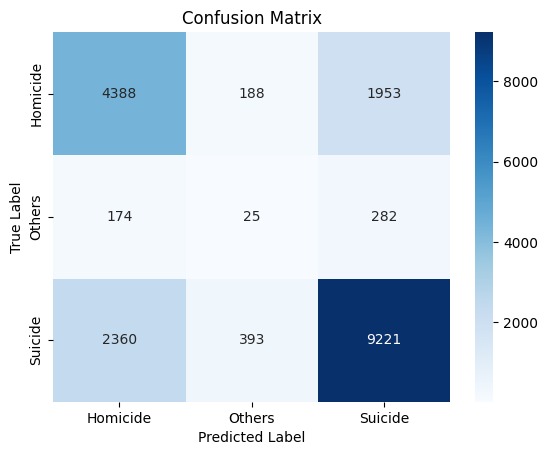

In [ ]:
# Visualize the confusion matrix using seaborn
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues",
            xticklabels = ['Homicide', 'Others', 'Suicide'],
            yticklabels = ['Homicide', 'Others', 'Suicide'])

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

................................................................................................................................................................................................................................................

### Step 7.3: Calculating the Precision, Recall and F1-Score For The Various Decision Tree Models

Since this is a multi-class classification matrix with highly imbalanced class data, we will use the concept of micro-averaging to determine the Precision, Recall and F1-Scores of the confusion matrix.

We will:

1) Calculate Precision, Recall and F1-Scores for the Unoptimised Decision Tree Model using `precision_score`, `recall_score` and `f1_score` respectively

2) Repeat the same process for the other Decision Tree Models - Optimised Decision Tree Models via `GridSearchCV`, `RandomizedSearchCV`, Bagging and Boosting.

For Unoptimised Decision Tree Model:

In [ ]:
precision_unoptimised = precision_score(y_test, y_pred, average = 'micro')
recall_unoptimised = recall_score(y_test, y_pred, average = 'micro')
f1_unoptimised = f1_score(y_test, y_pred, average = 'micro')

In [ ]:
print("Unoptimised Decision Tree Model:")
print("\n")
print(f"Precision: {precision_unoptimised:.3f}")
print(f"Recall: {recall_unoptimised:.3f}")
print(f"F1-Score: {f1_unoptimised:.3f}")

Unoptimised Decision Tree Model:


Precision: 0.718
Recall: 0.718
F1-Score: 0.718


For Optimised Decision Tree Model Via `GridSearchCV`:


In [ ]:
precision_GSCV = precision_score(y_test, y_pred_optimised_GSCV, average = 'micro')
recall_GSCV = recall_score(y_test, y_pred_optimised_GSCV, average = 'micro')
f1_GSCV = f1_score(y_test, y_pred_optimised_GSCV, average = 'micro')

In [ ]:
print("Optimised Decision Tree Model (GSCV):")
print("\n")
print(f"Precision: {precision_GSCV:.3f}")
print(f"Recall: {recall_GSCV:.3f}")
print(f"F1-Score: {f1_GSCV:.3f}")

Optimised Decision Tree Model (GSCV):


Precision: 0.825
Recall: 0.825
F1-Score: 0.825


For Optimised Decision Tree Model Via `RandomizedSearchCV`:

In [ ]:
precision_RSCV = precision_score(y_test, y_pred_optimised_RSCV, average = 'micro')
recall_RSCV = recall_score(y_test, y_pred_optimised_RSCV, average = 'micro')
f1_RSCV = f1_score(y_test, y_pred_optimised_RSCV, average = 'micro')

In [ ]:
print("Optimised Decision Tree Model (RSCV):")
print("\n")
print(f"Precision: {precision_RSCV:.3f}")
print(f"Recall: {recall_RSCV:.3f}")
print(f"F1-Score: {f1_RSCV:.3f}")

Optimised Decision Tree Model (RSCV):


Precision: 0.825
Recall: 0.825
F1-Score: 0.825


For Optimised Decision Tree Model Via Bagging:

In [ ]:
precision_bagging = precision_score(y_test, y_pred_rf_two, average = 'micro')
recall_bagging = recall_score(y_test, y_pred_rf_two, average = 'micro')
f1_bagging = f1_score(y_test, y_pred_rf_two, average = 'micro')

In [ ]:
print("Optimised Decision Tree Model (Bagging):")
print("\n")
print(f"Precision: {precision_bagging:.3f}")
print(f"Recall: {recall_bagging:.3f}")
print(f"F1-Score: {f1_bagging:.3f}")

Optimised Decision Tree Model (Bagging):


Precision: 0.794
Recall: 0.794
F1-Score: 0.794


For Optimised Decision Tree Model Via Boosting:

In [ ]:
precision_boosting = precision_score(y_test, y_pred_gb, average = 'micro')
recall_boosting = recall_score(y_test, y_pred_gb, average = 'micro')
f1_boosting = f1_score(y_test, y_pred_gb, average = 'micro')

In [ ]:
print("Optimised Decision Tree Model (Boosting):")
print("\n")
print(f"Precision: {precision_boosting:.3f}")
print(f"Recall: {recall_boosting:.3f}")
print(f"F1-Score: {f1_boosting:.3f}")

Optimised Decision Tree Model (Boosting):


Precision: 0.824
Recall: 0.824
F1-Score: 0.824


Summary of the Accuracies, Precision, Recall and F1-Scores of the 5 models (Approximate):

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Decision Tree Model</th>
    <th style="padding: 12px;">Accuracy</th>
    <th style="padding: 12px;">Precision</th>
    <th style="padding: 12px;">Recall</th>
    <th style="padding: 12px;">F1-Score</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">Unoptimsed</td>
    <td style="padding: 12px;">0.719</td>
    <td style="padding: 12px;">0.719</td>
    <td style="padding: 12px;">0.719</td>
    <td style="padding: 12px;">0.719</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - GridSearchCV</td>
    <td style="padding: 12px;">0.825</td>
    <td style="padding: 12px;">0.825</td>
    <td style="padding: 12px;">0.825</td>
    <td style="padding: 12px;">0.825</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - RandomizedSearchCV</td>
    <td style="padding: 12px;">0.825</td>
    <td style="padding: 12px;">0.825</td>
    <td style="padding: 12px;">0.825</td>
    <td style="padding: 12px;">0.825</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - Bagging</td>
    <td style="padding: 12px;">0.794</td>
    <td style="padding: 12px;">0.792</td>
    <td style="padding: 12px;">0.792</td>
    <td style="padding: 12px;">0.792</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - Boosting</td>
    <td style="padding: 12px;">0.830</td>
    <td style="padding: 12px;">0.830</td>
    <td style="padding: 12px;">0.830</td>
    <td style="padding: 12px;">0.830</td>
</tr>

</tbody>
</table>

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 8: Apply Suitable Sampling Techniques To The Dataset



### Actions Required:
  1. Evaluate The Most Suitble Sampling Method To Use
  2. Implement The Appropriate Sampling Method
  3. Re-Evalaute The Evaulation Metrics To Use
  4. Re-Run The Decision Tree Models To Obtain New Sets Of Metrics

................................................................................................................................................................................................................................................

### Step 8.1 Evaluating The Possible Sampling Methods For This Dataset


We have learnt 3 possible data sampling techniques that can possibly be used:

1) Undersampling - Involves reducing the size of the majority class to match or be closer to the minority class.

2) Oversampling - Increases the size of the minority class by duplicating or generating synthetic samples.

3) SMOTE (Synthetic Minority Over-sampling Technique) - New samples are created by interpolating between existing minority class instances.

In [ ]:
# Converting y_train From A Series To A Dataframe
y_train = pd.DataFrame(y_train)

print("Overview Of y_train Dataset:")
print("\n")

# Find Number Of Rows In y_train That Has Homicide As Reason
y_train_homicide = y_train[y_train['Reason Encoded'] == 0]
print(f"Number Of Rows Of Homcide Class: {len(y_train_homicide)}")

# Find Number Of Rows In y_train That Has Others As Reason
y_train_others = y_train[y_train['Reason Encoded'] == 1]
print(f"Number Of Rows Of Others Class: {len(y_train_others)}")

# Find Number Of Rows In y_train That Has Suicide As Reason
y_train_suicide = y_train[y_train['Reason Encoded'] == 2]
print(f"Number Of Rows Of Suicide Class: {len(y_train_suicide)}")

Overview Of y_train Dataset:


Number Of Rows Of Homcide Class: 26262
Number Of Rows Of Others Class: 1913
Number Of Rows Of Suicide Class: 47760


### Why We Chose SMOTE and Oversampling

We chose to implement SMOTE and oversampling in our approach to address the issue of class imbalance within the dataset. In datasets with imbalanced class distributions, machine learning models tend to be biased towards predicting the majority class, leading to poor predictive performance, especially for the minority class. This can significantly skew evaluation metrics, such as accuracy and recall, and lead to suboptimal model performance.

To mitigate this bias, oversampling methods like SMOTE were used to generate more data points for the minority class. SMOTE works by creating synthetic samples from existing minority class instances, rather than simply duplicating them. This helps the model learn more diverse features of the minority class, thus improving its ability to detect minority class patterns. By creating synthetic instances that represent plausible variations of the minority class, the model becomes better equipped to handle rare occurrences or underrepresented patterns in the data. Additionally, oversampling was selected because it can be implemented without removing any of the data, unlike under-sampling techniques that may discard valuable examples from the majority class. This is particularly important when we aim to retain as much information as possible from the dataset, especially for the majority class, which typically contains useful patterns for the model to learn from.


As for the Guns Incident Dataset, we have 47760 data rows for the `Suicide` class, 26262 data rows for the `Homicide` class and 1913 data rows for the `Others` class.

The number of rows for the `Suicide` class is almost twice as many as the number of rows of the `Homicide` class. Additionally, the number of rows of the `Homicide` class is about 14 times as many as the number of rows of the `Others` class. This shows that the training dataset is highly imbalanced.

If Undersampling method is implemented, we need to significantly reduce the number of rows of `Suicide` and `Homicide` classes. More than 95% of the data rows from `Suicide` class and 90% of the data rows from the `Homicide` class will be removed. With such high percentages of data removed, many important trends and outcomes that may affect the results of the Decision Tree model is removed and accuracy will be compromised.

We can consider implementing Oversampling method where we can duplicate records from the `Homicide` and `Others` classes to match a value that is similar to the number of rows of the `Suicide` class (approximately 45000 rows to make the dataset much less imbalanced). We can also attempt to apply the SMOTE method where we generate synthetic samples for the minority classes (`Homicide` and `Others`) by interpolating between existing data points.

Suitability Of The Sampling Methods For Guns Incident Dataset:

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Sampling Method</th>
    <th style="padding: 12px;">Suitable/Not Suitable</th>
    <th style="padding: 12px;">How To Implement</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">Undersampling</td>
    <td style="padding: 12px;">Not Suitable</td>
    <td style="padding: 12px;">-</td>
</tr>
<tr>
    <td style="padding: 12px;">Oversampling</td>
    <td style="padding: 12px;">Suitable</td>
    <td style="padding: 12px;">Duplicate Records In Homicide And Others Classes</td>
<tr>
    <td style="padding: 12px;">SMOTE</td>
    <td style="padding: 12px;">Suitable</td>
    <td style="padding: 12px;">Generate Synthetic Samples For Homicide And Others Clases Through Interpolation</td>
</tr>


</tbody>
</table>

................................................................................................................................................................................................................................................

### Step 8.2: Implementing The Appropriate Sampling Methods To The Imbalanced Dataset

#### Implementing The Oversampling Method

We can use the `RandomOverSampler` method from the `imbalanced-learn` package to carry out Oversampling the minority classes, which are `Homicide` and `Others`. We set the `random_state` to be 0 for consistency with the `random_state` value for the `train_test_split` defined earlier. Afterwards, we can apply `fit_resample` to the `X_train` and `y_train` for addition of duplicates to the initial training datasets. We call them `X_resampled` and `y_resampled` respectively.

In [ ]:
# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state = 0)

# Apply oversampling to X_train and y_train
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

We can now re-check the total number of rows in the `y_resampled` dataset that contain the classes `Homicide`, `Suicide` and `Others`. This is to ensure that the new `y_resampled` dataset is now balanced and the number of rows of each class is approximately the same.

In [ ]:
print("Overview Of y_resampled Dataset:")
print("\n")

# Find Number Of Rows In y_resampled That Has Homicide As Reason
y_resampled_homicide = y_resampled[y_resampled['Reason Encoded'] == 0]
print(f"Number Of Rows Of Homcide Class: {len(y_resampled_homicide)}")

# Find Number Of Rows In y_resampled That Has Others As Reason
y_resampled_others = y_resampled[y_resampled['Reason Encoded'] == 1]
print(f"Number Of Rows Of Others Class: {len(y_resampled_others)}")

# Find Number Of Rows In y_resampled That Has Suicide As Reason
y_resampled_suicide = y_resampled[y_resampled['Reason Encoded'] == 2]
print(f"Number Of Rows Of Suicide Class: {len(y_resampled_suicide)}")

Overview Of y_resampled Dataset:


Number Of Rows Of Homcide Class: 47760
Number Of Rows Of Others Class: 47760
Number Of Rows Of Suicide Class: 47760


After Oversampling the minority `Homicide` and `Others` classes through `RandomOverSampler`, we observe that the number of rows of all three classes - `Suicide`, `Homicide` and `Others` are exactly the same, having 47760 rows each. The `y_resampled` dataset is now completely balanced.

#### Implementing The SMOTE Method

We can use the `SMOTE` method from the `imbalanced-learn` package to carry out the SMOTE process. We set the `random_state` to be 0 for consistency with the `random_state` value for the `train_test_split` defined earlier. Afterwards, we can apply `fit_resample` to the `X_train` and `y_train` for addition of duplicates to the initial training datasets. We call them `X_SMOTE` and `y_SMOTE` respectively.

In [ ]:
# Initialize the RandomOverSampler
ros_two = SMOTE(random_state = 0)

# Apply oversampling to X_train and y_train
X_SMOTE, y_SMOTE = ros_two.fit_resample(X_train, y_train)

We can now re-check the total number of rows in the `y_SMOTE` dataset that contain the classes `Homicide`, `Suicide` and `Others`. This is to ensure that the new `y_SMOTE` dataset is now balanced and the number of rows of each class is approximately the same.

In [ ]:
print("Overview Of y_SMOTE Dataset:")
print("\n")

# Find Number Of Rows In y_resampled That Has Homicide As Reason
y_SMOTE_homicide = y_SMOTE[y_SMOTE['Reason Encoded'] == 0]
print(f"Number Of Rows Of Homcide Class: {len(y_SMOTE_homicide)}")

# Find Number Of Rows In y_resampled That Has Others As Reason
y_SMOTE_others = y_SMOTE[y_SMOTE['Reason Encoded'] == 1]
print(f"Number Of Rows Of Others Class: {len(y_SMOTE_others)}")

# Find Number Of Rows In y_resampled That Has Suicide As Reason
y_SMOTE_suicide = y_SMOTE[y_SMOTE['Reason Encoded'] == 2]
print(f"Number Of Rows Of Suicide Class: {len(y_SMOTE_suicide)}")

Overview Of y_SMOTE Dataset:


Number Of Rows Of Homcide Class: 47760
Number Of Rows Of Others Class: 47760
Number Of Rows Of Suicide Class: 47760


Similarly, after performing SMOTE process through `SMOTE`, we observe that the number of rows of all three classes - `Suicide`, `Homicide` and `Others` are exactly the same, having 47760 rows each. The `y_SMOTE` dataset is also completely balanced.

................................................................................................................................................................................................................................................

### Step 8.3: Evaluating The Suitable Metrics To Be Used After Resampling

Since the datasets are now completely balanced, with an equal number of rows of data for all three classes, **we can turn to macro average instead of micro average**. In a balanced dataset, each class has a similar number of samples. Using macro averaging ensures that the performance across all classes is treated equally, making it more suitable for balanced data. It reflects how well the model performs for each class individually, which is meaningful when all classes are balanced.

As for the other metrics, they are not really affected by whether the dataset is balanced or imbalanced. False Negatives are still more costly than False Positives and hence, Recall is still a more important metric to consider compared to Precision.

Overview Of Suitable Metrics After Resampling:

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">
    <thead>
        <tr>
            <th style="padding: 12px;">Metric Used</th>
            <th style="padding: 12px;">Importance</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="padding: 12px;">Accuracy</td>
            <td style="padding: 12px;">Moderately Important</td>
        </tr>
        <tr>
            <td style="padding: 12px;">Precision</td>
            <td style="padding: 12px;">Less Important</td>
        </tr>
        <tr>
            <td style="padding: 12px;">Recall</td>
            <td style="padding: 12px;">Very Important</td>
        </tr>
        <tr>
            <td style="padding: 12px;">F1-Score</td>
            <td style="padding: 12px;">Moderately Important</td>
        </tr>
        <tr>
            <td style="padding: 12px;">Micro Average</td>
            <td style="padding: 12px; color: red;">Not Recommended</td>
        <tr>
            <td style="padding: 12px;">Macro Average</td>
            <td style="padding: 12px; color: red;">To Be Used</td>
        </tr>
    </tbody>
</table>

................................................................................................................................................................................................................................................

## Step 9: Re-Run The Decision Tree Models For The Oversampling Method

We can re-run all the Decision Tree models that we have implemented so far - Unoptimised, Optimised via `GridSearchCV`, Optimised via `RandomizedSearchCV`, Optimised via Bagging and Optimised via Boosting to gauge the accuracy and other metrics of the models after oversampling technique is applied.

Re-implementing the Unoptimised Decision Tree Model:

In [ ]:
# Unoptimised Decision Tree Re-Implemented using resampled datasets
decision_tree_classifier.fit(X_resampled, y_resampled)
y_pred_oversampling = decision_tree_classifier.predict(X_test)

print(f"Unoptimised Model Accuracy (Oversampling): {accuracy_score(y_pred_oversampling, y_test):.3f}")
print(f"Unoptimised Model Precision (Oversampling): {precision_score(y_pred_oversampling, y_test, average = 'macro'):.3f}")
print(f"Unoptimised Model Recall (Oversampling): {recall_score(y_pred_oversampling, y_test, average = 'macro'):.3f}")
print(f"Unoptimised Model F1-Score (Oversampling): {f1_score(y_pred_oversampling, y_test, average = 'macro'):.3f}")

Unoptimised Model Accuracy (Oversampling): 0.712
Unoptimised Model Precision (Oversampling): 0.489
Unoptimised Model Recall (Oversampling): 0.486
Unoptimised Model F1-Score (Oversampling): 0.487


Re-implementing the Optimised Decision Tree Model Via `GridSearchCV` and `RandomizedSearchCV`:

In [ ]:
grid_search.fit(X_resampled, y_resampled)
print("Best Parameters (Grid Search CV): ",grid_search.best_params_)

randomized_search.fit(X_resampled, y_resampled)
print("Best Parameters (Randomized Search CV): ",randomized_search.best_params_)

Best Parameters (Grid Search CV):  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Parameters (Randomized Search CV):  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 9}


In [ ]:
# GridSearchCV Re-Implemented using resampled datasets
optimised_GSCV_oversampling = DecisionTreeClassifier(criterion = 'gini',
                                                     max_depth = 5,
                                                     min_samples_leaf = 2,
                                                     min_samples_split = 2)

optimised_GSCV_oversampling.fit(X_resampled, y_resampled)
y_pred_GSCV_oversampling = optimised_GSCV_oversampling.predict(X_test)

# RandomizedSearchCV Re-Implemented using resampled datasets
optimised_RSCV_oversampling = DecisionTreeClassifier(criterion = 'gini',
                                                     max_depth = 5,
                                                     min_samples_leaf = 5,
                                                     min_samples_split = 9)

optimised_RSCV_oversampling.fit(X_resampled, y_resampled)
y_pred_RSCV_oversampling = optimised_RSCV_oversampling.predict(X_test)

In [ ]:
print(f"Accuracy Score GSCV (Oversampling): {accuracy_score(y_pred_GSCV_oversampling, y_test):.3f}")
print(f"Precision Score GSCV (Oversampling): {precision_score(y_pred_GSCV_oversampling, y_test, average = 'macro'):.3f}")
print(f"Recall Score GSCV (Oversampling): {recall_score(y_pred_GSCV_oversampling, y_test, average = 'macro'):.3f}")
print(f"F1-Score GSCV (Oversampling): {f1_score(y_pred_GSCV_oversampling, y_test, average = 'macro'):.3f}")

Accuracy Score GSCV (Oversampling): 0.740
Precision Score GSCV (Oversampling): 0.576
Recall Score GSCV (Oversampling): 0.558
F1-Score GSCV (Oversampling): 0.548


In [ ]:
print(f"Accuracy Score RSCV (Oversampling): {accuracy_score(y_pred_RSCV_oversampling, y_test):.3f}")
print(f"Precision Score RSCV (Oversampling): {precision_score(y_pred_RSCV_oversampling, y_test, average = 'macro'):.3f}")
print(f"Recall Score RSCV (Oversampling): {recall_score(y_pred_RSCV_oversampling, y_test, average = 'macro'):.3f}")
print(f"F1-Score RSCV (Oversampling): {f1_score(y_pred_RSCV_oversampling, y_test, average = 'macro'):.3f}")

Accuracy Score RSCV (Oversampling): 0.740
Precision Score RSCV (Oversampling): 0.576
Recall Score RSCV (Oversampling): 0.558
F1-Score RSCV (Oversampling): 0.548


Re-implementing the Optimised Decision Tree Model Via Bagging and Boosting:

In [ ]:
accuracies_bagging_oversampling = []
accuracies_boosting_oversampling = []
precisions_bagging_oversampling = []
precisions_boosting_oversampling = []
recalls_bagging_oversampling = []
recalls_boosting_oversampling = []
f1_scores_bagging_oversampling = []
f1_scores_boosting_oversampling = []

In [ ]:
# Bagging Process Re-Implemented using resampled datasets
for i in range(n_iterations):
    bagging_oversampling = RandomForestClassifier(n_estimators = 50)
    bagging_oversampling.fit(X_resampled, y_resampled.values.ravel())
    y_pred_bagging_oversampling = bagging_oversampling.predict(X_test)
    accuracies_bagging_oversampling.append(accuracy_score(y_test, y_pred_bagging_oversampling))
    precisions_bagging_oversampling.append(precision_score(y_test, y_pred_bagging_oversampling, average='macro'))
    recalls_bagging_oversampling.append(recall_score(y_test, y_pred_bagging_oversampling, average='macro'))
    f1_scores_bagging_oversampling.append(f1_score(y_test, y_pred_bagging_oversampling, average='macro'))

In [ ]:
# Boosting Process Re-Implemented using resampled datasets
for i in range(n_iterations):
    base_tree = DecisionTreeClassifier(max_depth=5)
    boosting_oversampling = AdaBoostClassifier(estimator = base_tree,
                                               n_estimators = 50,
                                               random_state = 0,
                                               algorithm='SAMME')
    boosting_oversampling.fit(X_resampled, y_resampled.values.ravel())
    y_pred_boosting_oversampling = boosting_oversampling.predict(X_test)
    accuracies_boosting_oversampling.append(accuracy_score(y_test, y_pred_boosting_oversampling))
    precisions_boosting_oversampling.append(precision_score(y_test, y_pred_boosting_oversampling, average='macro'))
    recalls_boosting_oversampling.append(recall_score(y_test, y_pred_boosting_oversampling, average='macro'))
    f1_scores_boosting_oversampling.append(f1_score(y_test, y_pred_boosting_oversampling, average='macro'))

In [ ]:
print(f"Accuracy Score Bagging (Oversampling): {sum(accuracies_bagging_oversampling) / len(accuracies_bagging_oversampling):.3f}")
print(f"Precision Score Bagging (Oversampling): {sum(precisions_bagging_oversampling) / len(precisions_bagging_oversampling):.3f}")
print(f"Recall Score Bagging (Oversampling): {sum(recalls_bagging_oversampling) / len(recalls_bagging_oversampling):.3f}")
print(f"F1 Score Bagging (Oversampling): {sum(f1_scores_bagging_oversampling) / len(f1_scores_bagging_oversampling):.3f}")

Accuracy Score Bagging (Oversampling): 0.779
Precision Score Bagging (Oversampling): 0.535
Recall Score Bagging (Oversampling): 0.534
F1 Score Bagging (Oversampling): 0.533


In [ ]:
print(f"Accuracy Score Boosting (Oversampling): {sum(accuracies_boosting_oversampling) / len(accuracies_boosting_oversampling):.3f}")
print(f"Precision Score Boosting (Oversampling): {sum(precisions_boosting_oversampling) / len(precisions_boosting_oversampling):.3f}")
print(f"Recall Score Boosting (Oversampling): {sum(recalls_boosting_oversampling) / len(recalls_boosting_oversampling):.3f}")
print(f"F1 Score Boosting (Oversampling): {sum(f1_scores_boosting_oversampling) / len(f1_scores_boosting_oversampling):.3f}")

Accuracy Score Boosting (Oversampling): 0.697
Precision Score Boosting (Oversampling): 0.568
Recall Score Boosting (Oversampling): 0.581
F1 Score Boosting (Oversampling): 0.536


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 10: Re-Run The Decision Tree Models For The SMOTE Method

We can re-run all the Decision Tree models that we have implemented so far - Unoptimised, Optimised via `GridSearchCV`, Optimised via `RandomizedSearchCV`, Optimised via Bagging and Optimised via Boosting to gauge the accuracy and other metrics of the models after SMOTE technique is applied.

Re-implementing the Unoptimised Decision Tree Model:

In [ ]:
# Unoptimised Decision Tree Re-Implemented using SMOTE datasets
decision_tree_classifier.fit(X_SMOTE, y_SMOTE)
y_pred_SMOTE = decision_tree_classifier.predict(X_test)

print(f"Unoptimised Model Accuracy (SMOTE): {accuracy_score(y_pred_SMOTE, y_test):.3f}")
print(f"Unoptimised Model Precision (SMOTE): {precision_score(y_pred_SMOTE, y_test, average = 'macro'):.3f}")
print(f"Unoptimised Model Recall (SMOTE): {recall_score(y_pred_SMOTE, y_test, average = 'macro'):.3f}")
print(f"Unoptimised Model F1-Score (SMOTE): {f1_score(y_pred_SMOTE, y_test, average = 'macro'):.3f}")

Unoptimised Model Accuracy (SMOTE): 0.692
Unoptimised Model Precision (SMOTE): 0.500
Unoptimised Model Recall (SMOTE): 0.491
Unoptimised Model F1-Score (SMOTE): 0.490


Re-implementing the Optimised Decision Tree Model Via `GridSearchCV` and `RandomizedSearchCV`:

In [ ]:
grid_search.fit(X_SMOTE, y_SMOTE)
print("Best Parameters (Grid Search CV): ",grid_search.best_params_)

randomized_search.fit(X_SMOTE, y_SMOTE)
print("Best Parameters (Randomized Search CV): ",randomized_search.best_params_)

Best Parameters (Grid Search CV):  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Parameters (Randomized Search CV):  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 5}


In [ ]:
# GridSearchCV Re-Implemented using SMOTE datasets
optimised_GSCV_SMOTE = DecisionTreeClassifier(criterion = 'gini', max_depth = 5,
                                              min_samples_leaf = 10,
                                              min_samples_split = 2)

optimised_GSCV_SMOTE.fit(X_SMOTE, y_SMOTE)
y_pred_GSCV_SMOTE = optimised_GSCV_SMOTE.predict(X_test)


# RandomizedSearchCV Re-Implemented using SMOTE datasets
optimised_RSCV_SMOTE = DecisionTreeClassifier(criterion = 'gini', max_depth = 5,
                                              min_samples_leaf = 8,
                                              min_samples_split = 5)

optimised_RSCV_SMOTE.fit(X_SMOTE, y_SMOTE)
y_pred_RSCV_SMOTE = optimised_RSCV_SMOTE.predict(X_test)

In [ ]:
print(f"Accuracy Score GSCV (SMOTE): {accuracy_score(y_pred_GSCV_SMOTE, y_test):.3f}")
print(f"Precision Score GSCV (SMOTE): {precision_score(y_pred_GSCV_SMOTE, y_test, average = 'macro'):.3f}")
print(f"Recall Score GSCV (SMOTE): {recall_score(y_pred_GSCV_SMOTE, y_test, average = 'macro'):.3f}")
print(f"F1-Score GSCV (SMOTE): {f1_score(y_pred_GSCV_SMOTE, y_test, average = 'macro'):.3f}")

Accuracy Score GSCV (SMOTE): 0.673
Precision Score GSCV (SMOTE): 0.561
Recall Score GSCV (SMOTE): 0.561
F1-Score GSCV (SMOTE): 0.522


In [ ]:
print(f"Accuracy Score RSCV (SMOTE): {accuracy_score(y_pred_RSCV_SMOTE, y_test):.3f}")
print(f"Precision Score RSCV (SMOTE): {precision_score(y_pred_RSCV_SMOTE, y_test, average = 'macro'):.3f}")
print(f"Recall Score RSCV (SMOTE): {recall_score(y_pred_RSCV_SMOTE, y_test, average = 'macro'):.3f}")
print(f"F1-Score RSCV (SMOTE): {f1_score(y_pred_RSCV_SMOTE, y_test, average = 'macro'):.3f}")

Accuracy Score RSCV (SMOTE): 0.673
Precision Score RSCV (SMOTE): 0.561
Recall Score RSCV (SMOTE): 0.561
F1-Score RSCV (SMOTE): 0.522


Re-implementing the Optimised Decision Tree Model Via Bagging and Boosting:

In [ ]:
accuracies_bagging_SMOTE = []
accuracies_boosting_SMOTE = []
precisions_bagging_SMOTE = []
precisions_boosting_SMOTE = []
recalls_bagging_SMOTE = []
recalls_boosting_SMOTE = []
f1_scores_bagging_SMOTE = []
f1_scores_boosting_SMOTE = []

In [ ]:
# Bagging Process Re-Implemented using SMOTE datasets
for i in range(n_iterations):
    bagging_SMOTE = RandomForestClassifier(n_estimators=50)
    bagging_SMOTE.fit(X_SMOTE, y_SMOTE.values.ravel())
    y_pred_bagging_SMOTE = bagging_SMOTE.predict(X_test)
    accuracies_bagging_SMOTE.append(accuracy_score(y_test, y_pred_bagging_SMOTE))
    precisions_bagging_SMOTE.append(precision_score(y_test, y_pred_bagging_SMOTE, average='macro'))
    recalls_bagging_SMOTE.append(recall_score(y_test, y_pred_bagging_SMOTE, average='macro'))
    f1_scores_bagging_SMOTE.append(f1_score(y_test, y_pred_bagging_SMOTE, average='macro'))

In [ ]:
# Boosting Process Re-Implemented using SMOTE datasets
for i in range(n_iterations):
    base_tree = DecisionTreeClassifier(max_depth=5)
    boosting_SMOTE = AdaBoostClassifier(estimator = base_tree,
                                        n_estimators = 50,
                                        random_state = 0,
                                        algorithm='SAMME')
    boosting_SMOTE.fit(X_SMOTE, y_SMOTE.values.ravel())
    y_pred_boosting_SMOTE = boosting_SMOTE.predict(X_test)
    accuracies_boosting_SMOTE.append(accuracy_score(y_test, y_pred_boosting_SMOTE))
    precisions_boosting_SMOTE.append(precision_score(y_test, y_pred_boosting_SMOTE, average='macro'))
    recalls_boosting_SMOTE.append(recall_score(y_test, y_pred_boosting_SMOTE, average='macro'))
    f1_scores_boosting_SMOTE.append(f1_score(y_test, y_pred_boosting_SMOTE, average='macro'))

In [ ]:
print(f"Accuracy Score Bagging (SMOTE): {sum(accuracies_bagging_SMOTE) / len(accuracies_bagging_SMOTE):.3f}")
print(f"Precision Score Bagging (SMOTE): {sum(precisions_bagging_SMOTE) / len(precisions_bagging_SMOTE):.3f}")
print(f"Recall Score Bagging (SMOTE): {sum(recalls_bagging_SMOTE) / len(recalls_bagging_SMOTE):.3f}")
print(f"F1 Score Bagging (SMOTE): {sum(f1_scores_bagging_SMOTE) / len(f1_scores_bagging_SMOTE):.3f}")

Accuracy Score Bagging (SMOTE): 0.747
Precision Score Bagging (SMOTE): 0.528
Recall Score Bagging (SMOTE): 0.536
F1 Score Bagging (SMOTE): 0.529


In [ ]:
print(f"Accuracy Score Boosting (SMOTE): {sum(accuracies_boosting_SMOTE) / len(accuracies_boosting_SMOTE):.3f}")
print(f"Precision Score Boosting (SMOTE): {sum(precisions_boosting_SMOTE) / len(precisions_boosting_SMOTE):.3f}")
print(f"Recall Score Boosting (SMOTE): {sum(recalls_boosting_SMOTE) / len(recalls_boosting_SMOTE):.3f}")
print(f"F1 Score Boosting (SMOTE): {sum(f1_scores_boosting_SMOTE) / len(f1_scores_boosting_SMOTE):.3f}")

Accuracy Score Boosting (SMOTE): 0.727
Precision Score Boosting (SMOTE): 0.564
Recall Score Boosting (SMOTE): 0.570
F1 Score Boosting (SMOTE): 0.543


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 11: Evaluation of the 5 models, choosing the best model and re-constructing the decision tree diagram

### Actions Required:
  1. Overview of metric results for the cases of no sampling, oversampling and SMOTE
  2. Choosing the best model to use for Decision Tree



### Step 11.1: Overview Of Metric Results for the cases of no sampling, oversampling and SMOTE

No Sampling Techniques:

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Decision Tree Model</th>
    <th style="padding: 12px;">Accuracy</th>
    <th style="padding: 12px;">Precision</th>
    <th style="padding: 12px;">Recall</th>
    <th style="padding: 12px;">F1-Score</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">Unoptimsed</td>
    <td style="padding: 12px;">0.719</td>
    <td style="padding: 12px;">0.719</td>
    <td style="padding: 12px;">0.719</td>
    <td style="padding: 12px;">0.719</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - GridSearchCV</td>
    <td style="padding: 12px;">0.825</td>
    <td style="padding: 12px;">0.825</td>
    <td style="padding: 12px;">0.825</td>
    <td style="padding: 12px;">0.825</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - RandomizedSearchCV</td>
    <td style="padding: 12px;">0.825</td>
    <td style="padding: 12px;">0.825</td>
    <td style="padding: 12px;">0.825</td>
    <td style="padding: 12px;">0.825</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - Bagging</td>
    <td style="padding: 12px;">0.794</td>
    <td style="padding: 12px;">0.792</td>
    <td style="padding: 12px;">0.792</td>
    <td style="padding: 12px;">0.792</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - Boosting</td>
    <td style="padding: 12px;">0.824</td>
    <td style="padding: 12px;">0.824</td>
    <td style="padding: 12px;">0.824</td>
    <td style="padding: 12px;">0.824</td>
</tr>

</tbody>
</table>

With Oversampling:

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Decision Tree Model</th>
    <th style="padding: 12px;">Accuracy</th>
    <th style="padding: 12px;">Precision</th>
    <th style="padding: 12px;">Recall</th>
    <th style="padding: 12px;">F1-Score</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">Unoptimsed</td>
    <td style="padding: 12px;">0.711</td>
    <td style="padding: 12px;">0.489</td>
    <td style="padding: 12px;">0.485</td>
    <td style="padding: 12px;">0.487</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - GridSearchCV</td>
    <td style="padding: 12px;">0.740</td>
    <td style="padding: 12px;">0.577</td>
    <td style="padding: 12px;">0.558</td>
    <td style="padding: 12px;">0.548</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - RandomizedSearchCV</td>
    <td style="padding: 12px;">0.740</td>
    <td style="padding: 12px;">0.576</td>
    <td style="padding: 12px;">0.558</td>
    <td style="padding: 12px;">0.548</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - Bagging</td>
    <td style="padding: 12px;">0.779</td>
    <td style="padding: 12px;">0.534</td>
    <td style="padding: 12px;">0.533</td>
    <td style="padding: 12px;">0.533</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - Boosting</td>
    <td style="padding: 12px;">0.706</td>
    <td style="padding: 12px;">0.563</td>
    <td style="padding: 12px;">0.578</td>
    <td style="padding: 12px;">0.537</td>
</tr>

</tbody>
</table>

With SMOTE:
<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Decision Tree Model</th>
    <th style="padding: 12px;">Accuracy</th>
    <th style="padding: 12px;">Precision</th>
    <th style="padding: 12px;">Recall</th>
    <th style="padding: 12px;">F1-Score</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">Unoptimsed</td>
    <td style="padding: 12px;">0.691</td>
    <td style="padding: 12px;">0.502</td>
    <td style="padding: 12px;">0.491</td>
    <td style="padding: 12px;">0.491</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - GridSearchCV</td>
    <td style="padding: 12px;">0.673</td>
    <td style="padding: 12px;">0.561</td>
    <td style="padding: 12px;">0.561</td>
    <td style="padding: 12px;">0.522</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - RandomizedSearchCV</td>
    <td style="padding: 12px;">0.673</td>
    <td style="padding: 12px;">0.561</td>
    <td style="padding: 12px;">0.561</td>
    <td style="padding: 12px;">0.522</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - Bagging</td>
    <td style="padding: 12px;">0.746</td>
    <td style="padding: 12px;">0.527</td>
    <td style="padding: 12px;">0.535</td>
    <td style="padding: 12px;">0.528</td>
</tr>
<tr>
    <td style="padding: 12px;">Optimised - Boosting</td>
    <td style="padding: 12px;">0.710</td>
    <td style="padding: 12px;">0.562</td>
    <td style="padding: 12px;">0.572</td>
    <td style="padding: 12px;">0.537</td>
</tr>

</tbody>
</table>

###Understanding the performance drop after SMOTE and Oversampling

To explain the observed performance drop after applying both oversampling and SMOTE, we identified two potential reasons for this unexpected result:

1. We applied SMOTE and oversampling to create a balanced training set, where both the minority and majority classes were represented equally. However, our test set was still imbalanced, reflecting the true distribution of the data, where the majority class is more prevalent. As a result, the model, which was trained on a balanced dataset, became biased toward predicting the minority class more frequently. This occurred because the model learned to treat the minority class as equally important as the majority class due to the oversampling. When evaluated on the imbalanced test set, the model overpredicted the minority class (thinking it occurs more frequently than it does in the actual data), leading to a decrease in accuracy and precision. This mismatch between the training and test set distributions caused the performance metrics to drop.

2. We also considered that overfitting might have occurred, particularly with SMOTE and oversampling. These techniques involve creating synthetic data points, which could lead to the model memorizing these artificial samples instead of generalizing well to real-world data. As a result, the model might have overfitted to the training data which included these synthetic points, leading to a larger discrepancy between the performance on the training set and the test set. We saw a decline in recall, precision, and F1-score because the model struggled to generalize to the true distribution of the data in the test set, becoming too tailored to the synthetic instances generated by SMOTE and oversampling.

In conclusion, the decrease in performance after applying oversampling and SMOTE could be attributed to a mismatch between the balanced training set and the imbalanced test set, which caused the model to overpredict the minority class. Additionally, overfitting to the synthetic data created during the oversampling process likely contributed to the model's poor generalisation to the test set.

................................................................................................................................................................................................................................................

### Step 11.2: Choosing the best model to use for the Decision Tree

We will choose the best model for the Decision Tree based on three conditions:

**1) Highest value of Recall**

**2) Low runtime value**

**3) Presence of resampling techniques**

--------------------------------------------------------------------------------

From the results obtained, we observe that the Optimised Decision Tree (Boosting) has the highest Recall value for both the Oversampling and SMOTE datasets, making Boosting a suitable choice to be used as the Decision Tree model.

In terms of runtime, Boosting model takes the longest among the 5 models to run. However, having a runtime time of less than 2 minutes is still relatively fast as the Guns Incidence Dataset is a relatively small dataset with few features, coupled with only about 100000 rows to consider. Although other optimization models such as Bagging, GridSearchCV and RandomizedSearchCV takes less time to execute (about half the time), the time difference is not so significant and with a more powerful GPU/TPU, the code execution time for the Boosting process can be significantly reduced as well.

Additionally, although the recall value for the Decision Tree models that have no resampling techniques is much higher, it is still a good practice to apply resampling techniques to this Guns dataset as we have observed previosuly that the data outcomes are highly imbalanced and we need mitigation strategies (such as oversampling and SMOTE) to balance the dataset for training and testing.

In terms of which resampling technique to use, both Oversampling and SMOTE gives approximately the same recall value for the Boosting technique (very slightly higher for Oversampling). However, we will select SMOTE over Oversampling due to several reasons. Firstly, unlike random oversampling, which duplicates existing minority class samples, SMOTE generates synthetic samples. This reduces the likelihood of the model overfitting by introducing diversity in the minority class data. Also,the synthetic samples help the model learn patterns that generalize better to unseen data, leading to improved performance on test datasets. For Oversampling, since exact duplicates are created, the model might learn to memorize the oversampled data instead of generalizing. Oversampling also does not address class overlap or data sparsity in feature space.


**Therefore, the Decision Tree model that we will implement is the Gradient Boosting Clasifier with SMOTE resampling technique.**


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 12: Construct the Decision Tree Diagram

Now that we have identified the best model to use for our Decision Tree, we can visualize the structure of the Decision Tree Model. This helps us understand the decision-making process of the model and the features it considers important for making predictions. We will use the `plot_tree` function to create a diagram that illustrates the tree's splits and the conditions at each node.

### Actions Required:
  1. Extract out the feature names and class name from the cleaned dataset (to be used in the arguments of `plot_tree` later on).
  2. Plotting the Decision Tree diagrams for Boosting with SMOTE resampling technique with the appropriate layout, scaling, information and depth.

### Step 12.1: Extracting the feature names and class name from the cleaned dataset

We first need to extract the feature and class names from the cleaned dataset as this will ensure clarity and sensibility when the Decision Tree diagram is being plotted for easy analysis.

The feature names are all the independent variables in the dataset - `Year`, `Month`, `Day Of Week`, `Education Encoded`, `Sex Encoded`, `Age`, `Race Encoded`, `Place Encoded` and `Police involvement`.

`Reason Encoded` should NOT be included in the feature names as `Reason Encoded` is a target variable, not a feature.

The class names are the relevent possible outcomes of the target varaiable, which is `Reason Encoded`. The possible outcomes include `Homicide`, `Others` and `Suicide`.

In [ ]:
# Extract the feature names from the cleaned dataset
feature_names = ['Year', 'Month', 'Day Of Week', 'Education Encoded',
                 'Sex Encoded', 'Age', 'Race Encoded', 'Place Encoded',
                 'Police involvement']

# Include the relevent class names from the target variable of the dataset
class_names = ['Homicide', 'Others', 'Suicide']

### Step 12.2: Plotting the Decision Tree diagrams with appropriate layouts, scaling and information


Decision Tree plotting can be performed using the `plot_tree` function, taking in the `class_names` and `feature_names` arguments in Step 12.1. Other arguments such as `impurity`, `proportion`, `fontsize` and `rounded` are included to adjust and improve the quality of the Decision Tree image in terms of both appearence and information contained in the nodes.

Constructing The Decision Tree Diagram For `Boosting` Model with the resampling technique of SMOTE:

In [ ]:
tree_to_plot = boosting_SMOTE.estimators_[0]

plt.figure(figsize=(130, 40), dpi=300)

plot_tree(tree_to_plot, filled=True, rounded=True, fontsize=30,
          class_names=class_names, feature_names=feature_names,
          impurity=False, max_depth=4, proportion=False)

plt.title("Decision Tree from AdaBoost with SMOTE", fontsize=50)
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Final Conclusion
The implementation of the Gradient Boosting model has provided significant insights into the dataset, effectively revealing intricate patterns and relationships among features. The decision tree visualisation highlights key determinants influencing the model's predictions, underscoring the importance of these features in the classification process. This interpretability not only enhances our understanding of the model's decision-making but also serves as a foundation for further refinement.

In pursuit of optimising predictive performance, we may transit to logistic regression for comparative analysis. This exploration aims to leverage different modeling techniques, enhancing our overall accuracy and contributing to a more robust understanding of the data dynamics.